In [928]:
import os

path = './bbc/'

files = []
business = []
entertainment = []
politics = []
sport = []
tech = []

for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

for x in files:
    if 'business' in x:
        business.append(x)
    elif 'entertainment' in x:
        entertainment.append(x)
    elif 'politics' in x:
        politics.append(x)
    elif 'sport' in x:
        sport.append(x)
    else:
        tech.append(x)
    
print("Total number of files in dataset by category:")
print('Business',len(business))
print('Entertainment',len(entertainment))
print('Politics',len(politics))
print('Sport',len(sport))
print('Tech',len(tech))

Total number of files in dataset by category:
Business 510
Entertainment 386
Politics 417
Sport 511
Tech 401


In [618]:
businessArticles, entertainmentArticles, politicsArticles, sportArticles, techArticles = [],[],[],[],[]
def getData(x,category):
    f = open(x)
    if category == 'business':
        businessArticles.append(f.read().replace("\n", " "))
    elif category == 'entertainment':
        entertainmentArticles.append(f.read().replace("\n", " "))
    elif category == 'politics':
        politicsArticles.append(f.read().replace("\n", " "))
    elif category == 'sport':
        sportArticles.append(f.read().replace("\n", " "))
    elif category == 'tech':
        techArticles.append(f.read().replace("\n", " "))
    

for x in business:
    getData(x,'business')
    
for x in entertainment:
    getData(x,'entertainment')

for x in politics:
    getData(x,'politics')
    
for x in sport:
    getData(x,'sport')
    
for x in tech:
    getData(x,'tech')
    
allArticles = businessArticles + entertainmentArticles + politicsArticles + sportArticles + techArticles
    
print(len(businessArticles))
print(len(entertainmentArticles))
print(len(politicsArticles))
print(len(sportArticles))
print(len(techArticles))
print('Amount of articles:',len(allArticles))

510
386
417
511
401
Amount of articles: 2225


In [619]:
print(businessArticles[0:5],sep='\n')
print(entertainmentArticles[0:5],sep='\n')
print(politicsArticles[0:5],sep='\n')
print(sportArticles[0:5],sep='\n')
print(techArticles[0:5],sep='\n')

['Ad sales boost Time Warner profit  Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up

In [620]:
G20 = ['Argentina', 'Australia', 'Brazil', 'China', 'Canada', 'European Union', 'France', 'Germany',
      'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Turkey',
      'United Kingdom', 'United States', 'US', 'UK', 'EU', 'Europe']
print(G20)

['Argentina', 'Australia', 'Brazil', 'China', 'Canada', 'European Union', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Turkey', 'United Kingdom', 'United States', 'US', 'UK', 'EU', 'Europe']


In [621]:
#NEED TO CHECK IF 1 Article contains multiple countries
business = {}
entertainment = {}
politics = {}
sports = {}
tech = {}

def CheckG20(topic,category):
    for x in topic:
        for y in G20:
            if y in x:
                if category == 'business':
                    business.update({y:x})
                elif category == 'entertainment':
                    entertainment.update({y:x})
                elif category == 'politics':
                    politics.update({y:x})
                elif category == 'sport':
                    sports.update({y:x})
                elif category == 'tech':
                    tech.update({y:x})
    return


            
CheckG20(businessArticles, 'business')
CheckG20(entertainmentArticles, 'entertainment')
CheckG20(politicsArticles, 'politics')
CheckG20(sportArticles, 'sport')
CheckG20(techArticles, 'tech')

print(sports)

{'Russia': 'Safin relieved at Aussie recovery  Marat Safin admitted he thought he was suffering another Australian Open final nightmare when he lost the opening set to Lleyton Hewitt.  The Russian, who lost the 2002 and 2004 finals, fought back brilliantly to win 1-6 6-3 6-4 6-4. "I was nervous and I couldn\'t play tennis," said Safin. "He started really well. He wasn\'t as nervous as I was because I was thinking of the two finals that I played and wasn\'t successful." He added: "You really have to deal with the pressure because normally it never happens but when you come to the final you are so tight because you want to win. "I tried to play some tennis but I couldn\'t. He has huge experience, he\'s won two Grand Slam titles, he\'s won 24 titles, he\'s a great player and he deals with pressure."  From 4-1 down in the third set, Safin played some of his best tennis to reel off seven games and take control of the match. "In the third set, just all of a sudden, it all turn around complet

In [622]:
politics

{'UK': '\'Last chance\' warning for voters  People in England, Scotland and Wales must have registered by 1700 GMT to be able to vote in the general election if it is held, as expected, on 5 May.  Those who filled in forms last autumn should already be on the register - but those who have moved house or were on holiday may have been left off. There will also be elections for local councils and mayors in parts of England on 5 May. The deadline for voters to register in Northern Ireland expired on Thursday.  Completed registration forms can be handed into local authorities throughout the day on Friday, and some will accept them by fax. As well as for English county councils, polls for unitary authorities at Bristol, Isle of Wight and Stockton-on-Tees and mayors at Doncaster, Hartlepool, North Tyneside and Stoke-on-Trent are also scheduled for 5 May. Last week Preston City Council reported that more than 14,000 of its voters were not registered. Its electoral roll fell by 17.5% in a year 

In [623]:
#USE NLTK Tokenizer to tokenize and count the occurrence of each country

from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

def tokenizer (array):
    holder = []

    stop_words = set(stopwords.words('english'))

    for x in range(len(array)):
        temp = word_tokenize(array[x])
        holder.append(temp)


    #flatten list of lists
    flat_list = [item for sublist in holder for item in sublist]

    stopWordsRemoved = []

    for x in flat_list:
        if x not in stop_words:
            stopWordsRemoved.append(x)

    import string
    punctuations = list(string.punctuation)
    punctuations.append("''")
    pun = [i for i in stopWordsRemoved if i not in punctuations]
    return pun


cleanBusiness = tokenizer(businessArticles)
cleanEntertainment = tokenizer(entertainmentArticles)
cleanPolitics = tokenizer(politicsArticles)
cleanSports = tokenizer(sportArticles)
cleanTech = tokenizer(techArticles)
print(cleanSports)

['Claxton', 'hunting', 'first', 'major', 'medal', 'British', 'hurdler', 'Sarah', 'Claxton', 'confident', 'win', 'first', 'major', 'medal', 'next', 'month', "'s", 'European', 'Indoor', 'Championships', 'Madrid', 'The', '25-year-old', 'already', 'smashed', 'British', 'record', '60m', 'hurdles', 'twice', 'season', 'setting', 'new', 'mark', '7.96', 'seconds', 'win', 'AAAs', 'title', '``', 'I', 'quite', 'confident', 'said', 'Claxton', '``', 'But', 'I', 'take', 'race', 'comes', '``', 'As', 'long', 'I', 'keep', 'training', 'much', 'I', 'think', 'chance', 'medal', 'Claxton', 'national', '60m', 'hurdles', 'title', 'past', 'three', 'years', 'struggled', 'translate', 'domestic', 'success', 'international', 'stage', 'Now', 'Scotland-born', 'athlete', 'owns', 'equal', 'fifth-fastest', 'time', 'world', 'year', 'And', 'last', 'week', "'s", 'Birmingham', 'Grand', 'Prix', 'Claxton', 'left', 'European', 'medal', 'favourite', 'Russian', 'Irina', 'Shevchenko', 'trailing', 'sixth', 'spot', 'For', 'first', 

In [624]:
"""
Use set method on the list. Check each index of array against each index of G20

"""
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

def extraction (articles, category):
    
    print("Print out the list of countries found in: "+category +" articles")

    target = []
    overlap = [] 
    
    for x in range(len(articles)):
        holder = []
        temp = word_tokenize(articles[x])
        holder.append(temp)
        flat_list = [item for sublist in holder for item in sublist]
        countries = list(set(flat_list) & set(G20))

        if len(countries) > 0:
            print(countries)

            if len(countries) == 1:
                for y in range(len(countries)):
                    target.append(countries[y])
                    target.append(articles[x])
                
            if len(countries) > 1:
                for z in range(len(countries)):
                    overlap.append(countries[z])
                    overlap.append(articles[x])
            
    return target, overlap
            
                

#The first variable holds the array for articles in which only one country appears.
#The second variable holds the array for articles in which multiple countries are mentioned. 

BusinessArticles, BusinessArticlesOverlap = extraction(businessArticles, 'Business')
EntertainmentArticles, EntertainmentArticlesOverlap = extraction(entertainmentArticles, 'Entertainment')
PoliticsArticles, PoliticsArticlesOverlap = extraction(politicsArticles, 'Politics')
SportsArticles, SportsArticlesOverlap = extraction(sportArticles, 'Sports')
TechArticles, TechArticlesOverlap = extraction(techArticles, 'Tech')


Print out the list of countries found in: Business articles
['Europe', 'US']
['US', 'China']
['US', 'Russia']
['US', 'UK', 'France']
['Japan']
['US']
['UK', 'India', 'Brazil', 'US', 'China', 'Russia']
['US']
['Indonesia']
['Japan']
['Europe']
['EU']
['China']
['Italy', 'Europe']
['US', 'India', 'Russia']
['India']
['Europe', 'India']
['UK']
['Germany', 'Europe']
['France']
['US', 'China']
['US', 'Russia']
['US']
['Europe', 'US']
['US', 'China', 'Russia']
['UK']
['Japan', 'Germany', 'US', 'Europe', 'China']
['Japan']
['UK', 'China']
['UK', 'US']
['UK', 'US']
['Japan']
['US', 'Russia']
['China', 'Italy', 'Japan', 'US', 'France']
['UK']
['US']
['UK']
['Japan']
['US']
['Japan']
['Europe']
['Europe', 'UK']
['US', 'Europe', 'China']
['Italy', 'US']
['Italy']
['Europe', 'India']
['China']
['UK']
['Mexico', 'Europe']
['US']
['US']
['Germany', 'UK', 'France']
['UK']
['US']
['Germany', 'US']
['US', 'Germany', 'EU', 'France']
['Germany', 'Europe']
['US']
['India']
['US']
['US']
['Japan']
['German

['US']
['US']
['US']
['US']
['US']
['US']
['US']
['UK', 'France']
['UK']
['US']
['US']
['US']
['US']
['US']
['US']
['US']
['US']
['Canada', 'Japan', 'UK', 'US', 'Europe']
['UK']
['US']
['UK']
['US']
['US']
['US']
['UK']
['US']
['US']
['Europe']
['Japan', 'US']
['UK', 'US']
['UK', 'US']
['France']
['US', 'Russia']
['US']
['UK', 'US']
['US']
['US']
['US', 'France']
['US']
['US']
['US']
['US']
['UK', 'US']
['UK']
['UK']
['US']
['US', 'Germany', 'UK', 'France']
['UK']
['Japan', 'UK', 'Germany', 'US', 'Europe']
['UK']
['UK', 'US']
['UK']
['US', 'France']
['UK', 'US', 'India']
['UK']
['UK']
['China']
['UK']
['Japan', 'Australia', 'UK', 'US']
['US']
['UK', 'US']
['Europe', 'Australia', 'UK', 'US']
['UK', 'US']
['Australia', 'UK', 'US']
['UK', 'US']
['UK', 'US']
['UK', 'US']
['UK']
['UK']
['UK', 'US']
['UK', 'US']
['US']
['UK', 'US']
['UK', 'US']
['Germany']
['Italy', 'Germany']
['UK']
['UK']
['UK', 'US']
['US']
['UK', 'US']
['US']
['UK']
['UK']
['UK', 'US']
['Australia']
['Europe', 'US']
['UK

['Italy']
['US']
['US']
['UK', 'US']
['UK']
['EU']
['Europe', 'UK']
['US']
['Europe', 'UK']
['US']
['UK']
['India']
['Japan', 'Europe', 'US']
['UK']
['US']
['UK', 'US']
['Europe', 'EU', 'US']
['UK']
['Germany', 'UK', 'US']
['UK', 'US']
['Europe', 'UK', 'US']
['US']
['US']
['Europe', 'US']
['Europe', 'UK', 'France']
['UK']
['US']
['UK']
['US']
['Europe', 'EU', 'US']
['UK']
['Europe', 'UK', 'France']
['Europe']
['Japan']
['Japan', 'UK']
['Italy', 'Europe', 'US']
['Germany', 'UK', 'France', 'Europe']
['US']
['US', 'China']
['Japan', 'Europe', 'US']
['UK']
['UK']
['UK']
['US', 'Europe', 'EU', 'China']
['UK']
['US', 'China']
['US']
['US']
['Europe']
['US']
['Europe', 'EU', 'US']
['US']
['UK', 'US']
['China']
['Japan', 'Europe', 'UK', 'US']
['UK']
['US']
['Mexico', 'US', 'Argentina', 'France']
['US']
['UK']
['UK']
['UK']
['US']
['UK']
['Canada', 'US']
['US']
['Italy', 'Japan', 'UK', 'US', 'Europe']
['UK', 'US']
['India']
['US', 'China']
['Germany', 'UK', 'US']
['Australia', 'Brazil', 'US']
[

In [625]:
#Print out the country followed by the article
print(BusinessArticles)

['Japan', 'Japan narrowly escapes recession  Japan\'s economy teetered on the brink of a technical recession in the three months to September, figures show.  Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth.  The government was keen to play down the worrying implications of the data. "I maintain the view that Japan\'s economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It\'s painting a picture of a recovery... much patchier than previously thought," sai

In [626]:
print(EntertainmentArticles)

['US', 'Jarre joins fairytale celebration  French musician Jean-Michel Jarre is to perform at a concert in Copenhagen to mark the bicentennial of the birth of writer Hans Christian Andersen.  Denmark is holding a three-day celebration of the life of the fairy-tale author, with a concert at Parken stadium on 2 April. Other stars are expected to join the line-up in the coming months, and the Danish royal family will attend. "Christian Andersen\'s fairy tales are timeless and universal," said Jarre. "For all of us, at any age there is always - beyond the pure enjoyment of the tale - a message to learn." There are year-long celebrations planned across the world to celebrate Andersen and his work, which includes The Emperor\'s New Clothes and The Little Mermaid. Denmark\'s Crown Prince Frederik and Crown Princess Mary visited New York on Monday to help promote the festivities. The pair were at a Manhattan library to honour US literary critic Harold Bloom "the international icon we thought w

In [627]:
print(PoliticsArticles)

['UK', 'Fox attacks Blair\'s Tory \'lies\'  Tony Blair lied when he took the UK to war so has no qualms about lying in the election campaign, say the Tories.  Tory co-chairman Liam Fox was speaking after Mr Blair told Labour members the Tories offered a "hard right agenda". Dr Fox told BBC Radio: "If you are willing to lie about the reasons for going to war, I guess you are going to lie about anything at all." He would not discuss reports the party repaid Â£500,000 to Lord Ashcroft after he predicted an election defeat.  The prime minister ratcheted up Labour\'s pre-election campaigning at the weekend with a helicopter tour of the country and his speech at the party\'s spring conference. He insisted he did not know the poll date, but it is widely expected to be 5 May.  In what was seen as a highly personal speech in Gateshead on Sunday, Mr Blair said: "I have the same passion and hunger as when I first walked through the door of 10 Downing Street." He described his relationship with th

In [628]:
print(SportsArticles)

['France', 'Greene sets sights on world title  Maurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer.  He had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal. "It really hurts to look at that medal. It was my mistake. I lost because of the things I did," said Greene, who races in Birmingham on Friday. "It\'s never going to happen again. My goal - I\'m going to win the worlds." Greene crossed the line just 0.02 seconds behind Gatlin, who won in 9.87 seconds in one of the closest and fastest sprints of all time. But Greene believes he lost the race and his title in the semi-finals. "In my semi-final race, I should have won the race but I was conserving energy. "That\'s when Francis Obikwelu came up and I took third because I didn\'t know he was there. "I believe that\'s what put me in lane seven in the final and, while I was in lane seven, I couldn\'

In [629]:
print(TechArticles)

['China', 'China net cafe culture crackdown  Chinese authorities closed 12,575 net cafes in the closing months of 2004, the country\'s government said.  According to the official news agency most of the net cafes were closed down because they were operating illegally. Chinese net cafes operate under a set of strict guidelines and many of those most recently closed broke rules that limit how close they can be to schools. The move is the latest in a series of steps the Chinese government has taken to crack down on what it considers to be immoral net use.  The official Xinhua News Agency said the crackdown was carried out to create a "safer environment for young people in China". Rules introduced in 2002 demand that net cafes be at least 200 metres away from middle and elementary schools. The hours that children can use net cafes are also tightly regulated. China has long been worried that net cafes are an unhealthy influence on young people. The 12,575 cafes were shut in the three months

In [630]:
#TRY STORING INTO NUMPY ARRAY: THE KEY FOLLOWED BY THE ARTICLE

import numpy as np

def altElement(a):
    
    country = []
    article = [] 
    
    for x in range(len(a)):
        if x % 2 == 0:
            country.append(a[x])
        else:
            article.append(a[x])
            
    out = np.column_stack((country, article))
    
    return out

business = altElement(BusinessArticles)
entertainment = altElement(EntertainmentArticles)
politics = altElement(PoliticsArticles)
sports = altElement(SportsArticles)
tech = altElement(TechArticles)

bOverlap = altElement(BusinessArticlesOverlap)
eOverlap = altElement(EntertainmentArticlesOverlap)
pOverlap = altElement(PoliticsArticlesOverlap)
sOverlap = altElement(SportsArticlesOverlap)
tOverlap = altElement(TechArticlesOverlap)

print('Business Matrix',(np.shape(business)))
print('Entertainment Matrix',(np.shape(entertainment)))
print('Politics Matrix',(np.shape(politics)))
print('Sports Matrix',(np.shape(sports)))
print('Tech Matrix',(np.shape(tech)))
print('\n')
print('Business Overlap Matrix',(np.shape(bOverlap)))
print('Entertainment Overlap Matrix',(np.shape(eOverlap)))
print('Politics Overlap Matrix',(np.shape(pOverlap)))
print('Sports Overlap Matrix',(np.shape(sOverlap)))
print('Tech Overlap Matrix',(np.shape(tOverlap)))

Business Matrix (231, 2)
Entertainment Matrix (159, 2)
Politics Matrix (120, 2)
Sports Matrix (150, 2)
Tech Matrix (161, 2)


Business Overlap Matrix (567, 2)
Entertainment Overlap Matrix (228, 2)
Politics Overlap Matrix (209, 2)
Sports Overlap Matrix (204, 2)
Tech Overlap Matrix (342, 2)


In [631]:
from collections import Counter as count 

def buildDict(arr):
    temp = count(arr)
    result = dict(temp)
    return result


CountriesCountBusiness = buildDict(business[:,0])
CountriesCountEntertainment = buildDict(entertainment[:,0])
CountriesCountPolitics = buildDict(politics[:,0])
CountriesCountSports = buildDict(sports[:,0])
CountriesCountTech = buildDict(tech[:,0])

CountOverlapBusiness = buildDict(bOverlap[:,0])
CountOverlapEntertainment = buildDict(eOverlap[:,0])
CountOverlapPolitics = buildDict(pOverlap[:,0])
CountOverlapSports = buildDict(sOverlap[:,0])
CountOverlapTech = buildDict(tOverlap[:,0])

print('Business By Single Country:', CountriesCountBusiness,'\n')
print('Entertainment By Single Country:', CountriesCountEntertainment,'\n')
print('Politics By Single Country:', CountriesCountPolitics,'\n')
print('Sports By Single Country:', CountriesCountSports,'\n')
print('Tech By Single Country:', CountriesCountTech,'\n')

Business By Single Country: {'Japan': 11, 'US': 105, 'Indonesia': 3, 'Europe': 11, 'EU': 1, 'China': 13, 'India': 12, 'UK': 48, 'France': 3, 'Italy': 4, 'Turkey': 3, 'Russia': 5, 'Australia': 4, 'Mexico': 1, 'Brazil': 4, 'Germany': 3} 

Entertainment By Single Country: {'US': 85, 'UK': 52, 'Canada': 2, 'France': 3, 'Japan': 5, 'India': 4, 'Germany': 2, 'Europe': 2, 'China': 1, 'Australia': 3} 

Politics By Single Country: {'UK': 92, 'US': 8, 'Europe': 9, 'EU': 4, 'Australia': 4, 'Indonesia': 1, 'Russia': 1, 'Mexico': 1} 

Sports By Single Country: {'France': 47, 'Australia': 18, 'UK': 5, 'Germany': 15, 'Canada': 1, 'US': 26, 'Europe': 14, 'Italy': 15, 'Japan': 1, 'Brazil': 3, 'Mexico': 1, 'Argentina': 3, 'India': 1} 

Tech By Single Country: {'China': 5, 'UK': 67, 'Italy': 2, 'US': 57, 'EU': 2, 'India': 5, 'Europe': 13, 'Japan': 7, 'Germany': 1, 'France': 2} 



In [632]:
print('Business By Overlapping Countries:',CountOverlapBusiness,'\n')
print('Entertainment By Overlapping Countries:',CountOverlapEntertainment,'\n')
print('Politics By Overlapping Countries:',CountOverlapPolitics,'\n')
print('Sports By Overlapping Countries:',CountOverlapSports,'\n')
print('Tech By Overlapping Country:',CountOverlapTech,'\n')

Business By Overlapping Countries: {'Europe': 71, 'US': 145, 'China': 51, 'Russia': 34, 'UK': 57, 'France': 29, 'India': 34, 'Brazil': 8, 'Italy': 11, 'Germany': 33, 'Japan': 27, 'Mexico': 5, 'EU': 22, 'Argentina': 6, 'Australia': 13, 'Canada': 4, 'Turkey': 5, 'Indonesia': 12} 

Entertainment By Overlapping Countries: {'UK': 68, 'US': 76, 'Italy': 4, 'Canada': 9, 'Japan': 7, 'Germany': 9, 'Argentina': 1, 'Europe': 21, 'Australia': 7, 'EU': 1, 'France': 14, 'India': 5, 'China': 2, 'Brazil': 1, 'Russia': 1, 'Mexico': 1, 'Indonesia': 1} 

Politics By Overlapping Countries: {'Europe': 31, 'UK': 63, 'Canada': 4, 'Japan': 4, 'Germany': 12, 'EU': 31, 'France': 10, 'India': 4, 'US': 26, 'Italy': 2, 'Turkey': 4, 'Russia': 4, 'Australia': 6, 'China': 6, 'Indonesia': 1, 'Mexico': 1} 

Sports By Overlapping Countries: {'Australia': 26, 'France': 57, 'Germany': 3, 'UK': 5, 'Russia': 14, 'US': 14, 'Italy': 38, 'Japan': 5, 'China': 4, 'Turkey': 1, 'Europe': 10, 'Brazil': 4, 'Argentina': 11, 'Mexico':

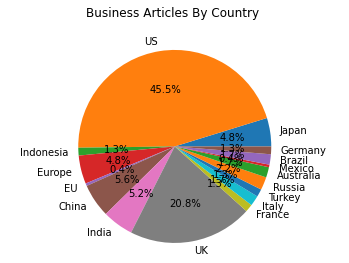

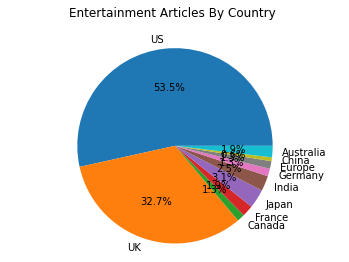

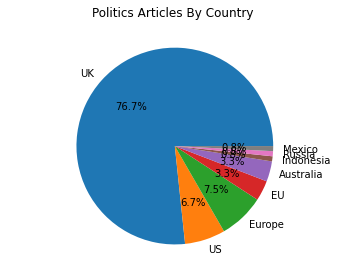

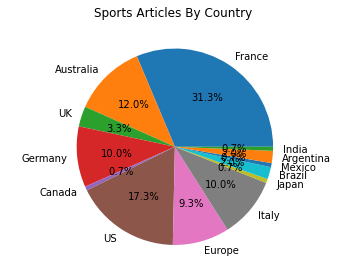

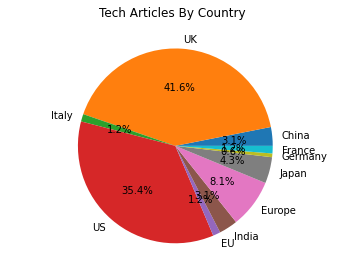

In [633]:
import matplotlib.pyplot as plt


def createVis(data, category):
    %matplotlib inline

    labels = data.keys()
    sizes = data.values()


    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax.axis('equal') 
    ax.set_title(category+' Articles By Country \n')


    plt.show()
    print('\n')
    

createVis(CountriesCountBusiness,'Business')    
createVis(CountriesCountEntertainment,'Entertainment')
createVis(CountriesCountPolitics,'Politics')
createVis(CountriesCountSports,'Sports')
createVis(CountriesCountTech,'Tech')

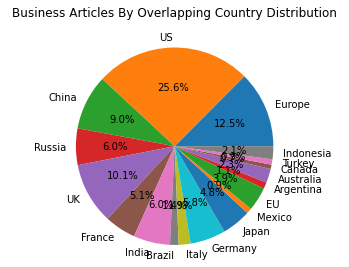

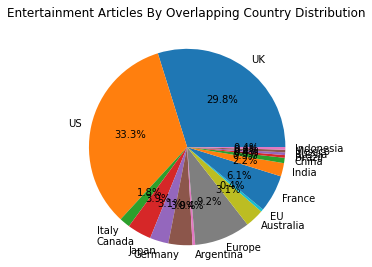

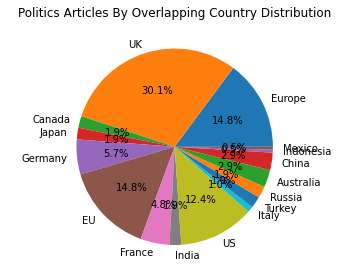

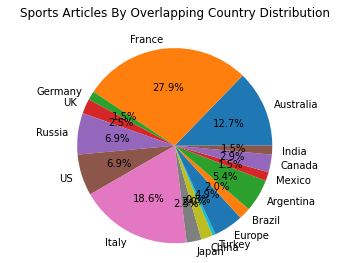

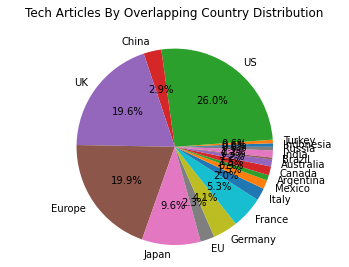

In [634]:
import matplotlib.pyplot as plt


def createVis(data, category):
    %matplotlib inline

    labels = data.keys()
    sizes = data.values()


    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax.axis('equal') 
    ax.set_title(category+' Articles By Overlapping Country Distribution\n')


    plt.show()
    print('\n')
    

createVis(CountOverlapBusiness,'Business')    
createVis(CountOverlapEntertainment,'Entertainment')
createVis(CountOverlapPolitics,'Politics')
createVis(CountOverlapSports,'Sports')
createVis(CountOverlapTech,'Tech')

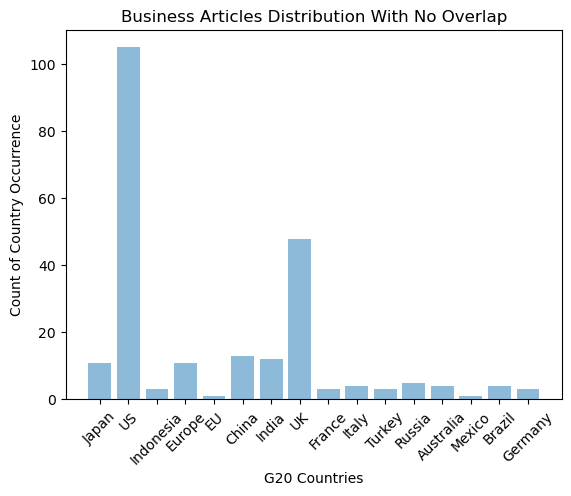

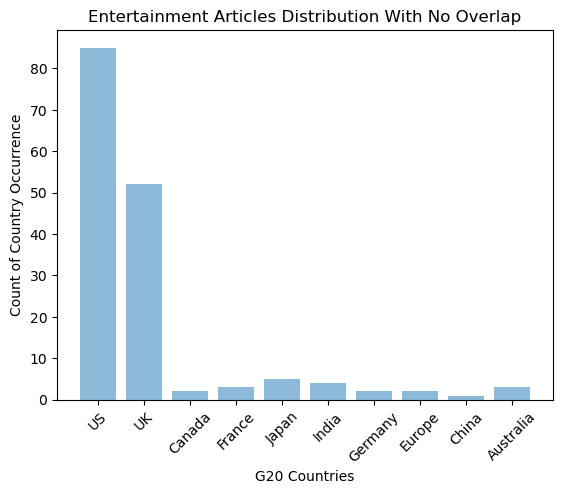

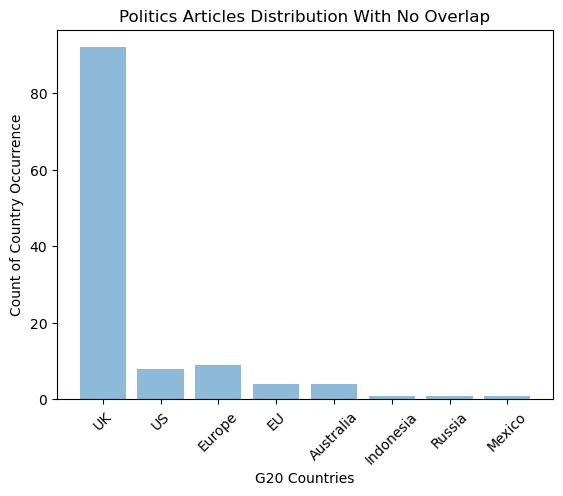

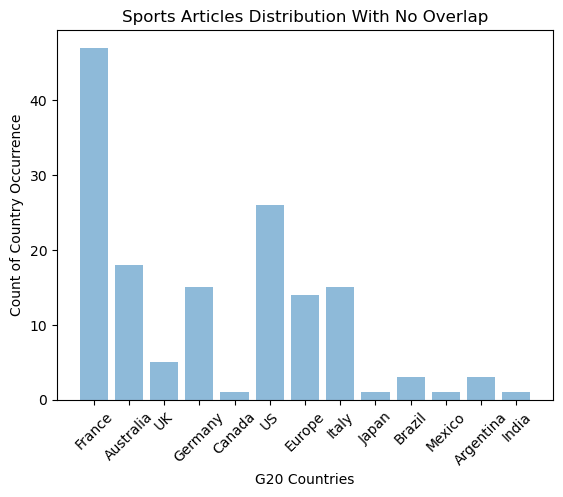

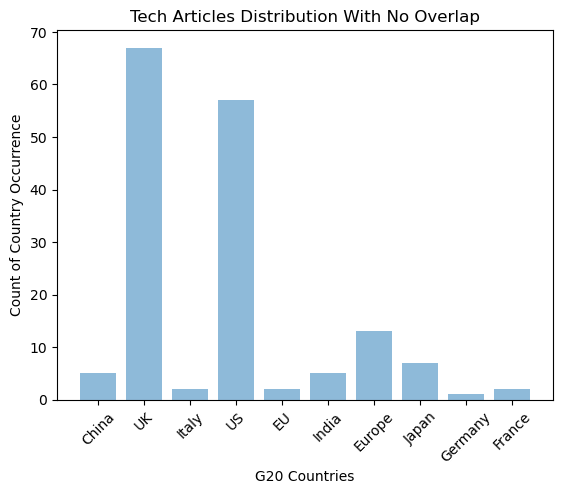

In [635]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def createBar(data,category):
    

    objects = data.keys()
    y_pos = np.arange(len(objects))
    performance = data.values()

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects, rotation=45)
    plt.ylabel('Count of Country Occurrence')
    plt.xlabel('G20 Countries')
    plt.title(category+" Articles Distribution With No Overlap")

    plt.show()
    
createBar(CountriesCountBusiness,'Business')    
createBar(CountriesCountEntertainment,'Entertainment')
createBar(CountriesCountPolitics,'Politics')
createBar(CountriesCountSports,'Sports')
createBar(CountriesCountTech,'Tech')

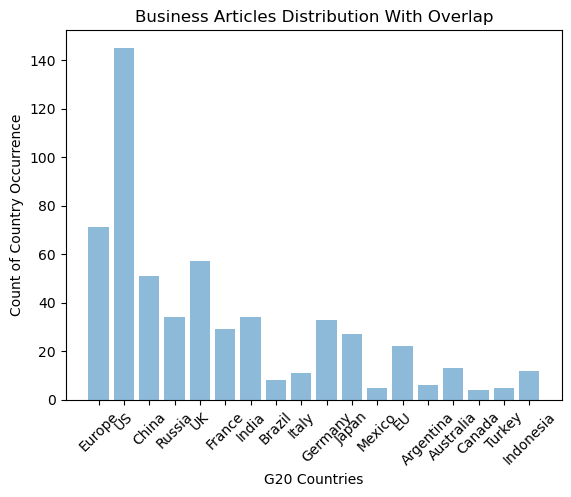

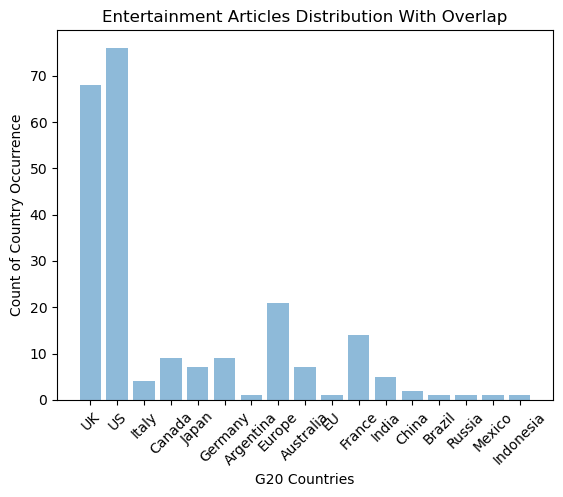

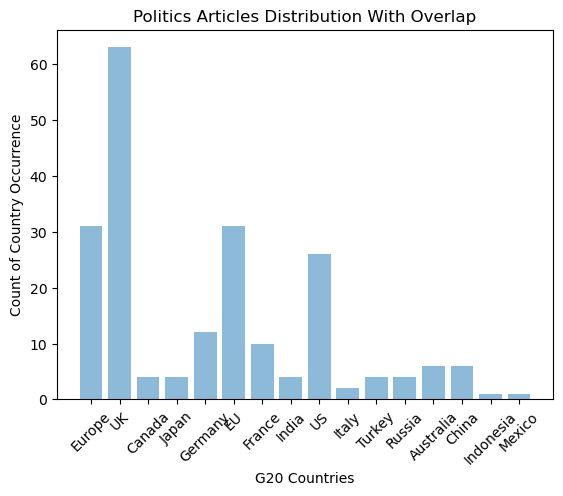

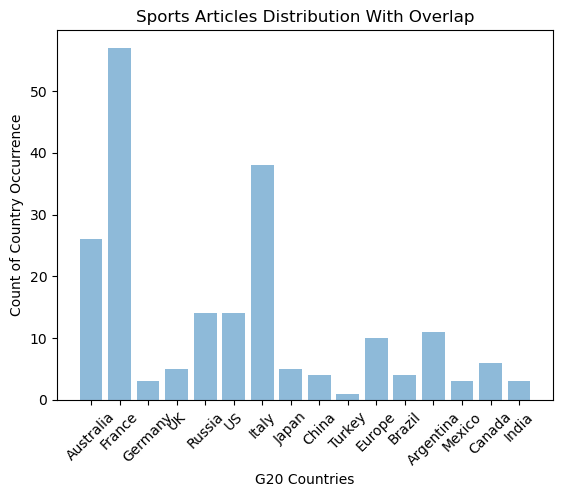

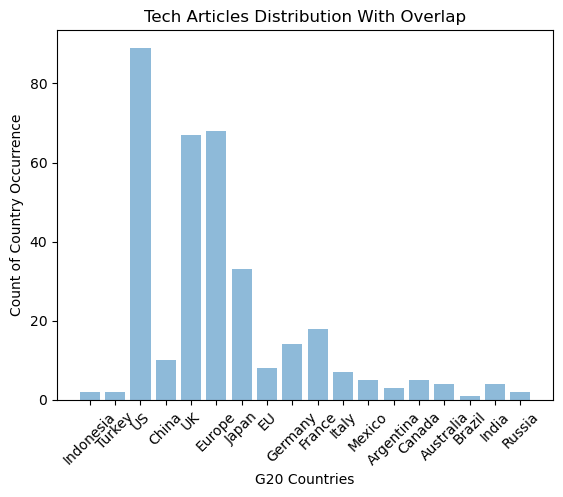

In [636]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def createBar(data,category):
    

    objects = data.keys()
    y_pos = np.arange(len(objects))
    performance = data.values()

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects, rotation=45)
    plt.ylabel('Count of Country Occurrence')
    plt.xlabel('G20 Countries')
    plt.title(category+" Articles Distribution With Overlap")

    plt.show()
    
createBar(CountOverlapBusiness,'Business')    
createBar(CountOverlapEntertainment,'Entertainment')
createBar(CountOverlapPolitics,'Politics')
createBar(CountOverlapSports,'Sports')
createBar(CountOverlapTech,'Tech')

In [637]:
import pandas as pd 
import nltk 
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

stop_words = set(stopwords.words('english'))

#Let's group the articles together by country and store in a dataframe

def createDataFrameAndClean (data):
    
    df = pd.DataFrame({'country': data[:,0], 'article': data[:,1]}, columns=['country', 'article'])
    update = df.groupby(['country'])['article'].apply(''.join).reset_index()

    Country = {}

    for index, row in update.iterrows():
        Country[row['country']] = row['article']
    
    helper = list(Country.values())    
    return Country


businessClean = createDataFrameAndClean(business)
entertainmentClean = createDataFrameAndClean(entertainment)
politicsClean = createDataFrameAndClean(politics)
sportsClean = createDataFrameAndClean(sports)
techClean = createDataFrameAndClean(tech)

bOverlapClean = createDataFrameAndClean(bOverlap)
eOverlapClean = createDataFrameAndClean(eOverlap)
pOverlapClean = createDataFrameAndClean(pOverlap)
sOverlapClean = createDataFrameAndClean(sOverlap)
tOverlapClean = createDataFrameAndClean(tOverlap)

tOverlapClean

{'Argentina': 'Web radio takes Spanish rap global  Spin the radio dial in the US and you are likely to find plenty of Spanish-language music. But what you will not find is much Spanish-language hip-hop.  Hip-hop and rap are actually quite popular in the Spanish-speaking world, but local artists are having trouble marketing their work abroad. But now, a US company is bringing rap and hip-hop en espanol to computer users everywhere. Los Caballeros de Plan G are one of Mexico\'s hottest hip-hop acts. They have a devoted fan base in their native Monterrey. But most Mexican hip-hop fans, not to mention fans in most of the Spanish-speaking world, rarely get a chance to hear the group\'s tracks on the radio.  "You can\'t really just go on the radio and listen to hip-hop in Spanish... it\'s just not accessible," says Manuel Millan, a native of San Diego, California. "It\'s really hard for the Spanish hip-hop scene to get into mainstream radio. You usually have a very commercialised sound and t

In [697]:
def clean (data):
    
    targetDict = {}
    
    for country, article in data.items():
        val = (helper(article))
        targetDict[country] = val
        
    return (targetDict)

    
def helper (art):
    targetArray = []
    
    words = nltk.word_tokenize(str(art))
    tokenizer = [word for word in words if word.isalnum()]
    targetArray.append(tokenizer)

    total = 0
    targetSize = len(targetArray)
    for x in range(targetSize):
        total = total + len(targetArray[x])

    print("Total number of words in articles:",total)    

    flat_list = [item for sublist in targetArray for item in sublist]

    stopWordsRemoved = []
    
    stop_words = nltk.corpus.stopwords.words('english')
    newStopWords = ['A','The','It','Said','And','Or','Nor','On','Of','In','At','I','But','Mr','Ms','Mrs','Mss','a','the','it',
               'said','and','or','nor','on','of','in','at','i','but','mr','mrs','ms','but','they','is','Is','are','Are','an','B','As']
    stop_words.extend(newStopWords)
    
    for x in flat_list:
        if x not in stop_words:
            stopWordsRemoved.append(x)


    print('Total tokens after stop words removed',len(stopWordsRemoved))    


    #apply lemmatization 
    lemmatiziedArray = []

    def lemmatization(dataString): 
        lemmatizer = WordNetLemmatizer()
        holder = lemmatizer.lemmatize(dataString)
        return holder

    for x in stopWordsRemoved:
        helper = lemmatization(x)
        lemmatiziedArray.append(helper)
        
        
    #Remove if needed
    from nltk.stem import PorterStemmer

    # Stemming & Lemmatization
    stemmer = nltk.PorterStemmer()
    lemmatizer = nltk.WordNetLemmatizer()

    # Applying both stemming & lemmatization on the string
    normalized_stem_data = [stemmer.stem(word) for word in lemmatiziedArray]
    clean_text = [lemmatizer.lemmatize(word) for word in normalized_stem_data]
    
    return clean_text

CleanBusiness = clean(businessClean)
CleanEntertainment = clean(entertainmentClean)
CleanPolitics = clean(politicsClean)
CleanSports = clean(sportsClean)
CleanTech = clean(techClean)

CleanBusinessOver = clean(bOverlapClean)
CleanEntertainmentOver = clean(eOverlapClean)
CleanPoliticsOver = clean(pOverlapClean)
CleanSportsOver = clean(sOverlapClean)
CleanTechOver = clean(tOverlapClean)

Total number of words in articles: 1058
Total tokens after stop words removed 655
Total number of words in articles: 1238
Total tokens after stop words removed 740
Total number of words in articles: 3787
Total tokens after stop words removed 2277
Total number of words in articles: 592
Total tokens after stop words removed 342
Total number of words in articles: 3706
Total tokens after stop words removed 2188
Total number of words in articles: 660
Total tokens after stop words removed 409
Total number of words in articles: 784
Total tokens after stop words removed 468
Total number of words in articles: 3309
Total tokens after stop words removed 2006
Total number of words in articles: 1014
Total tokens after stop words removed 612
Total number of words in articles: 1136
Total tokens after stop words removed 680
Total number of words in articles: 2714
Total tokens after stop words removed 1617
Total number of words in articles: 309
Total tokens after stop words removed 179
Total number of 

Total number of words in articles: 5893
Total tokens after stop words removed 3107
Total number of words in articles: 1127
Total tokens after stop words removed 655
Total number of words in articles: 37614
Total tokens after stop words removed 20565
Total number of words in articles: 18996
Total tokens after stop words removed 10230
Total number of words in articles: 4738
Total tokens after stop words removed 2944
Total number of words in articles: 11828
Total tokens after stop words removed 7162
Total number of words in articles: 1449
Total tokens after stop words removed 811
Total number of words in articles: 1870
Total tokens after stop words removed 1135
Total number of words in articles: 889
Total tokens after stop words removed 522
Total number of words in articles: 5946
Total tokens after stop words removed 3315
Total number of words in articles: 22921
Total tokens after stop words removed 13465
Total number of words in articles: 1512
Total tokens after stop words removed 1010
T

In [698]:
AustraliaCleanBusiness = CleanBusiness['Australia']
BrazilCleanBusiness = CleanBusiness['Brazil']
ChinaCleanBusiness = CleanBusiness['China']
EuropeCleanBusiness = CleanBusiness['EU'] + CleanBusiness['Europe']
FranceCleanBusiness = CleanBusiness['France']
GermanyCleanBusiness = CleanBusiness['Germany']
IndiaCleanBusiness = CleanBusiness['India']
IndonesiaCleanBusiness = CleanBusiness['Indonesia']
ItalyCleanBusiness = CleanBusiness['Italy']
JapanCleanBusiness = CleanBusiness['Japan']
MexicoCleanBusiness = CleanBusiness['Mexico']
RussiaCleanBusiness = CleanBusiness['Russia']
TurkeyCleanBusiness = CleanBusiness['Turkey']
UKCleanBusiness = CleanBusiness['UK']
USCleanBusiness = CleanBusiness['US']

AustraliaCleanEntertainment = CleanEntertainment['Australia']
CanadaCleanEntertainment = CleanEntertainment['Canada']
EuropeCleanEntertainment = CleanEntertainment['Europe']
FranceCleanEntertainment = CleanEntertainment['France']
GermanyCleanEntertainment = CleanEntertainment['Germany']
IndiaCleanEntertainment = CleanEntertainment['India']
JapanCleanEntertainment = CleanEntertainment['Japan']
UKCleanEntertainment = CleanEntertainment['UK']
USCleanEntertainment = CleanEntertainment['US']

AustraliaCleanPolitics = CleanPolitics['Australia']
EuropeCleanPolitics = CleanPolitics['EU'] + CleanPolitics['Europe']
IndonesiaCleanPolitics = CleanPolitics['Indonesia']
MexicoCleanPolitics = CleanPolitics['Mexico']
RussiaCleanPolitics = CleanPolitics['Russia']
UKCleanPolitics = CleanPolitics['UK']
USCleanPolitics = CleanPolitics['US']

ArgentinaCleanSports = CleanSports['Argentina']
AustraliaCleanSports = CleanSports['Australia']
BrazilCleanSports = CleanSports['Brazil']
CanadaCleanSports = CleanSports['Canada']
EuropeCleanSports = CleanSports['Europe']
FranceCleanSports = CleanSports['France']
GermanyCleanSports = CleanSports['Germany']
IndiaCleanSports = CleanSports['India']
ItalyCleanSports = CleanSports['Italy']
JapanCleanSports = CleanSports['Japan']
MexicoCleanSports = CleanSports['Mexico']
UKCleanSports = CleanSports['UK']
USCleanSports = CleanSports['US']

ChinaCleanTech = CleanTech['China']
EuropeCleanTech = CleanTech['EU'] + CleanTech['Europe']
FranceCleanTech = CleanTech['France']
GermanyCleanTech = CleanTech['Germany']
IndiaCleanTech = CleanTech['India']
ItalyCleanTech = CleanTech['Italy']
JapanCleanTech = CleanTech['Japan']
UKCleanTech = CleanTech['UK']
USCleanTech = CleanTech['US']

ArgentinaCleanBusinessOver = CleanBusinessOver['Argentina']
AustraliaCleanBusinessOver = CleanBusinessOver['Australia']
BrazilCleanBusinessOver = CleanBusinessOver['Brazil']
CanadaCleanBusinessOver = CleanBusinessOver['Canada']
ChinaCleanBusinessOver = CleanBusinessOver['China']
EuropeCleanBusinessOver = CleanBusinessOver['EU'] + CleanBusinessOver['Europe']
FranceCleanBusinessOver = CleanBusinessOver['France']
GermanyCleanBusinessOver = CleanBusinessOver['Germany']
IndiaCleanBusinessOver = CleanBusinessOver['India']
IndonesiaCleanBusinessOver = CleanBusinessOver['Indonesia']
ItalyCleanBusinessOver = CleanBusinessOver['Italy']
JapanCleanBusinessOver = CleanBusinessOver['Japan']
MexicoCleanBusinessOver = CleanBusinessOver['Mexico']
RussiaCleanBusinessOver = CleanBusinessOver['Russia']
TurkeyCleanBusinessOver = CleanBusinessOver['Turkey']
UKCleanBusinessOver = CleanBusinessOver['UK']
USCleanBusinessOver = CleanBusinessOver['US']

ArgentinaCleanEntertainmentOver = CleanEntertainmentOver['Argentina']
AustraliaCleanEntertainmentOver = CleanEntertainmentOver['Australia']
BrazilCleanEntertainmentOver = CleanEntertainmentOver['Brazil']
CanadaCleanEntertainmentOver = CleanEntertainmentOver['Canada']
ChinaCleanEntertainmentOver = CleanEntertainmentOver['China']
EuropeCleanEntertainmentOver = CleanEntertainmentOver['Europe'] + CleanEntertainmentOver['EU']
FranceCleanEntertainmentOver = CleanEntertainmentOver['France']
GermanyCleanEntertainmentOver = CleanEntertainmentOver['Germany']
IndiaCleanEntertainmentOver = CleanEntertainmentOver['India']
IndonesiaCleanEntertainmentOver = CleanEntertainmentOver['Indonesia']
ItalyCleanEntertainmentOver = CleanEntertainmentOver['Italy']
JapanCleanEntertainmentOver = CleanEntertainmentOver['Japan']
MexicoCleanEntertainmentOver = CleanEntertainmentOver['Mexico']
RussiaCleanEntertainmentOver = CleanEntertainmentOver['Russia']
UKCleanEntertainmentOver = CleanEntertainmentOver['UK']
USCleanEntertainmentOver = CleanEntertainmentOver['US']

AustraliaCleanPoliticsOver = CleanPoliticsOver['Australia']
CanadaCleanPoliticsOver = CleanPoliticsOver['Canada']
ChinaCleanPoliticsOver = CleanPoliticsOver['China']
EuropeCleanPoliticsOver = CleanPoliticsOver['EU'] + CleanPoliticsOver['Europe']
FranceCleanPoliticsOver = CleanPoliticsOver['France']
GermantCleanPoliticsOver = CleanPoliticsOver['Germany']
IndiaCleanPoliticsOver = CleanPoliticsOver['India']
IndonesiaCleanPoliticsOver = CleanPoliticsOver['Indonesia']
JapanCleanPoliticsOver = CleanPoliticsOver['Japan']
MexicoCleanPoliticsOver = CleanPoliticsOver['Mexico']
RussiaCleanPoliticsOver = CleanPoliticsOver['Russia']
TurkeyCleanPoliticsOver = CleanPoliticsOver['Turkey']
UKCleanPoliticsOver = CleanPoliticsOver['UK']
USCleanPoliticsOver = CleanPoliticsOver['US']

ArgentinaCleanSportsOver = CleanSportsOver['Argentina']
AustraliaCleanSportsOver = CleanSportsOver['Australia']
BrazilCleanSportsOver = CleanSportsOver['Brazil']
CanadaCleanSportsOver = CleanSportsOver['Canada']
ChinaCleanSportsOver = CleanSportsOver['China']
EuropeCleanSportsOver = CleanSportsOver['Europe']
FranceCleanSportsOver = CleanSportsOver['France']
GermanyCleanSportsOver = CleanSportsOver['Germany']
IndiaCleanSportsOver = CleanSportsOver['India']
ItalyCleanSportsOver = CleanSportsOver['Italy']
JapanCleanSportsOver = CleanSportsOver['Japan']
MexicoCleanSportsOver = CleanSportsOver['Mexico']
RussiaCleanSportsOver = CleanSportsOver['Russia']
TurkeyCleanSportsOver = CleanSportsOver['Turkey']
UKCleanSportsOver = CleanSportsOver['UK']
USCleanSportsOver = CleanSportsOver['US']

ArgentinaCleanTechOver = CleanTechOver['Argentina']
AustraliaCleanTechOver = CleanTechOver['Australia']
BrazilCleanTechOver = CleanTechOver['Brazil']
CanadaCleanTechOver = CleanTechOver['Canada']
ChinaCleanTechOver = CleanTechOver['China']
EuropeCleanTechOver = CleanTechOver['EU'] + CleanTechOver['Europe']
FranceCleanTechOver = CleanTechOver['France']
GermanyCleanTechOver = CleanTechOver['Germany']
IndiaCleanTechOver = CleanTechOver['India']
IndonesiaCleanTechOver = CleanTechOver['Indonesia']
ItalyCleanTechOver = CleanTechOver['Italy']
JapanCleanTechOver = CleanTechOver['Japan']
MexicoCleanTechOver = CleanTechOver['Mexico']
RussiaCleanTechOver = CleanTechOver['Russia']
TurkeyCleanTechOver = CleanTechOver['Turkey']
UKCleanTechOver = CleanTechOver['UK']
USCleanTechOver = CleanTechOver['US']

print(AustraliaCleanBusinessOver)

['french', 'wine', 'get', '70m', 'euro', 'french', 'govern', 'hand', 'struggl', 'wine', 'industri', '70m', 'euro', '91m', 'aid', 'help', 'battl', 'fall', 'sale', 'damag', 'overproduct', 'financi', 'packag', 'aim', 'assist', 'vintner', 'financi', 'troubl', 'improv', 'wine', 'market', 'french', 'wine', 'industri', 'world', 'second', 'largest', 'hit', 'declin', 'consumpt', 'home', 'grow', 'popular', 'new', 'world', 'wine', 'wine', 'maker', 'howev', 'claim', 'support', 'go', 'far', 'enough', 'packag', 'announc', 'agricultur', 'minist', 'dominiqu', 'bussereau', 'talk', 'vintner', 'repres', 'bulk', 'money', '40m', 'euro', 'offer', 'form', 'preferenti', 'loan', 'heavili', 'indebt', 'produc', 'enabl', 'reschedul', 'payment', '15m', 'euro', 'made', 'avail', 'wine', 'cooper', 'make', 'major', 'french', 'produc', 'low', 'interest', 'loan', 'effort', 'promot', 'french', 'wine', 'abroad', 'boost', 'extra', 'euro', 'fund', 'franc', 'fell', 'behind', 'world', 'produc', 'australia', 'chile', 'unit', '

In [878]:
#Prepare to extract topics by Country

Argentina = [ArgentinaCleanSports, ArgentinaCleanBusinessOver, ArgentinaCleanEntertainmentOver,ArgentinaCleanSportsOver, ArgentinaCleanTechOver]
Australia = [AustraliaCleanBusiness, AustraliaCleanBusinessOver, AustraliaCleanEntertainment, AustraliaCleanEntertainmentOver,AustraliaCleanPolitics, AustraliaCleanPoliticsOver,ArgentinaCleanSports, ArgentinaCleanSportsOver,ArgentinaCleanTechOver]
Brazil = [BrazilCleanBusiness,BrazilCleanBusinessOver,BrazilCleanEntertainmentOver,BrazilCleanSports,BrazilCleanSportsOver,BrazilCleanTechOver]
Canada = [CanadaCleanBusinessOver, CanadaCleanEntertainmentOver,CanadaCleanPoliticsOver,CanadaCleanSportsOver,CanadaCleanTechOver]
China = [ChinaCleanBusinessOver,ChinaCleanEntertainmentOver, ChinaCleanPoliticsOver, ChinaCleanSportsOver, ChinaCleanTech, ChinaCleanTechOver]
Europe = [EuropeCleanBusiness, EuropeCleanBusinessOver, EuropeCleanEntertainment, EuropeCleanEntertainmentOver, EuropeCleanPolitics, EuropeCleanPoliticsOver, EuropeCleanSports, EuropeCleanSportsOver, EuropeCleanTech, EuropeCleanTechOver]
France = [FranceCleanBusiness, FranceCleanBusinessOver, FranceCleanEntertainment, FranceCleanEntertainmentOver, FranceCleanPoliticsOver, FranceCleanSports, FranceCleanSportsOver, FranceCleanTech, FranceCleanTechOver]
Germany = [GermanyCleanBusiness, GermanyCleanBusinessOver, GermanyCleanEntertainment, GermanyCleanEntertainmentOver, GermanyCleanSports, GermanyCleanSportsOver, GermanyCleanTech, GermanyCleanTechOver]
India = [IndiaCleanBusiness, IndiaCleanBusinessOver, IndiaCleanEntertainment, IndiaCleanEntertainmentOver,IndiaCleanPoliticsOver,IndiaCleanSports, IndiaCleanSportsOver, IndiaCleanTech, IndiaCleanTechOver]
Indonesia = [IndonesiaCleanBusiness, IndonesiaCleanBusinessOver, IndonesiaCleanEntertainmentOver, IndonesiaCleanPolitics, IndonesiaCleanPoliticsOver,IndonesiaCleanTechOver]
Italy = [ItalyCleanBusiness, ItalyCleanBusinessOver, ItalyCleanEntertainmentOver, ItalyCleanSports, ItalyCleanSportsOver, ItalyCleanTech, ItalyCleanTechOver]
Japan = [JapanCleanBusiness, JapanCleanBusinessOver, JapanCleanEntertainment, JapanCleanEntertainmentOver, JapanCleanPoliticsOver, JapanCleanSports, JapanCleanSportsOver, JapanCleanTech, JapanCleanTechOver]
Mexico = [MexicoCleanBusiness, MexicoCleanBusinessOver, MexicoCleanEntertainmentOver, MexicoCleanPolitics, MexicoCleanPoliticsOver, MexicoCleanSports, MexicoCleanSportsOver, MexicoCleanTechOver]
Russia = [RussiaCleanBusiness, RussiaCleanBusinessOver, RussiaCleanEntertainmentOver, RussiaCleanPolitics, RussiaCleanPoliticsOver, RussiaCleanSportsOver, RussiaCleanTechOver]
Turkey = [TurkeyCleanBusiness, TurkeyCleanBusinessOver, TurkeyCleanPoliticsOver, TurkeyCleanSportsOver, TurkeyCleanTechOver]
UnitedKingdom = [UKCleanBusiness, UKCleanBusinessOver, UKCleanEntertainment, UKCleanEntertainmentOver, UKCleanPolitics, UKCleanPoliticsOver,UKCleanSports, UKCleanSportsOver, UKCleanTech, UKCleanTechOver]
UnitedStates = [USCleanBusiness, USCleanBusinessOver, USCleanEntertainment, USCleanEntertainmentOver, USCleanPolitics, USCleanPoliticsOver, USCleanSports, USCleanSportsOver, USCleanTech, USCleanTechOver]


UnitedStates

[['job',
  'growth',
  'still',
  'slow',
  'US',
  'US',
  'creat',
  'fewer',
  'job',
  'expect',
  'januari',
  'fall',
  'jobseek',
  'push',
  'unemploy',
  'rate',
  'lowest',
  'level',
  'three',
  'year',
  'accord',
  'labor',
  'depart',
  'figur',
  'US',
  'firm',
  'ad',
  'job',
  'januari',
  'gain',
  'payrol',
  'market',
  'expect',
  'new',
  'job',
  'nevertheless',
  'enough',
  'push',
  'unemploy',
  'rate',
  'lowest',
  'level',
  'sinc',
  'septemb',
  '2001',
  'job',
  'gain',
  'mean',
  'presid',
  'bush',
  'celebr',
  'albeit',
  'fine',
  'margin',
  'net',
  'growth',
  'job',
  'US',
  'economi',
  'first',
  'term',
  'offic',
  'He',
  'presid',
  'net',
  'fall',
  'job',
  'last',
  'novemb',
  'presidenti',
  'elect',
  'first',
  'presid',
  'sinc',
  'herbert',
  'hoover',
  'As',
  'result',
  'job',
  'creation',
  'becam',
  'key',
  'issu',
  'last',
  'year',
  'elect',
  'howev',
  'ad',
  'decemb',
  'januari',
  'figur',
  'administr'

In [879]:
def topicModeling (data):
    

    id2word = corpora.Dictionary(data)
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=10, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)

    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]    
    return lda_model, corpus, id2word

In [880]:
print('Printing Topics For Argentina')

lda_model, corpus, id2word = topicModeling(Argentina)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Argentina
[(0,
  '0.001*"federico" + 0.001*"aim" + 0.001*"80" + 0.001*"De" + 0.001*"leader" + '
  '0.001*"34" + 0.001*"allegedli" + 0.001*"easi" + 0.001*"24" + 0.001*"decad"'),
 (1,
  '0.001*"De" + 0.001*"80" + 0.001*"allegedli" + 0.001*"federico" + '
  '0.001*"aim" + 0.001*"belgium" + 0.001*"2002" + 0.001*"easi" + 0.001*"fell" '
  '+ 0.001*"acquaint"'),
 (2,
  '0.001*"80" + 0.001*"federico" + 0.001*"aim" + 0.001*"easi" + 0.001*"De" + '
  '0.001*"allegedli" + 0.001*"account" + 0.001*"fell" + 0.001*"25" + '
  '0.001*"china"'),
 (3,
  '0.012*"80" + 0.011*"federico" + 0.010*"aim" + 0.008*"easi" + 0.008*"De" + '
  '0.006*"allegedli" + 0.006*"china" + 0.006*"2002" + 0.005*"account" + '
  '0.005*"fell"'),
 (4,
  '0.001*"80" + 0.001*"federico" + 0.001*"china" + 0.001*"aim" + '
  '0.001*"expect" + 0.001*"De" + 0.001*"conclus" + 0.001*"feed" + 0.001*"easi" '
  '+ 0.001*"2002"'),
 (5,
  '0.001*"federico" + 0.001*"aim" + 0.001*"easi" + 0.001*"80" + 0.001*"De" + '
  '0.001*"all

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
3     -0.158268 -0.0       1        1  99.994858
4      0.013330  0.0       2        1   0.001084
0      0.020304 -0.0       3        1   0.000577
1      0.020190 -0.0       4        1   0.000576
9      0.019858  0.0       5        1   0.000530
5      0.018760 -0.0       6        1   0.000520
2      0.017734 -0.0       7        1   0.000494
6      0.016182 -0.0       8        1   0.000458
7      0.015956 -0.0       9        1   0.000451
8      0.015954 -0.0      10        1   0.000447, topic_info=          Term       Freq      Total Category  logprob  loglift
321         80  53.000000  53.000000  Default  30.0000  30.0000
90    federico  50.000000  50.000000  Default  29.0000  29.0000
350        aim  45.000000  45.000000  Default  28.0000  28.0000
503       easi  36.000000  36.000000  Default  27.0000  27.0000
324         De  35.000000  35.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
120   heineken   0.000011  12.516418  Topic10  -7.5052  -1.6273
531     extend   0.000011  17.292381  Topic10  -7.4985  -1.9438
1054  acquaint   0.000011  21.122206  Topic10  -7.4930  -2.1384
441    conclus   0.000011  19.194563  Topic10  -7.4963  -2.0460
527     expect   0.000011  21.103811  Topic10  -7.4961  -2.1406

[635 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
303       1  1.002680       2002
1013      1  0.994265         24
309       1  0.992165         25
311       1  0.979353         30
313       1  0.994605         34
321       1  1.007942         80
324       1  0.987435         De
325       1  0.975106         El
1040      1  0.994654          M
335       1  0.998283    account
1054      1  0.994214   acquaint
337       1  0.965005     acquir
348       1  0.992277       agua
350       1  1.000750        aim
353       1  1.005412  allegedli
20        1  0.965095       also
22        1  1.039016   american
23        1  0.964689      anoth
39        1  0.996705    belgium
1127      1  1.037735       boca
399       1  0.979127     burden
410       1  1.039193      centr
412       1  0.975163   challeng
418       1  1.004293      china
64        1  0.970524   comeback
439       1  0.985886    concept
441       1  0.989864    conclus
453       1  1.038819      court
464       1  1.038795        cut
467       1  1.039068     dawson
472       1  0.996491      decad
78        1  0.979444    delight
503       1  0.988809       easi
504       1  0.996792      eclac
520       1  1.037594   european
527       1  0.995081     expect
531       1  0.983092     extend
532       1  0.979425     extrem
536       1  0.979141      faith
89        1  0.986414     famili
90        1  1.005421   federico
91        1  0.997295       feed
539       1  0.998860       fell
102       1  0.964786       four
105       1  0.983277       game
576       1  1.038724      grant
580       1  0.970336     growth
582       1  0.975092       halt
118       1  0.975173     happen
120       1  1.038636   heineken
140       1  1.038785       land
144       1  0.994222     leader
754       1  1.037130       rate
208       1  0.983034      repli
217       1  1.038687       rule
236       1  1.037724     situat
260       1  1.038000      three
289       1  0.978836      worst, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 2, 10, 6, 3, 7, 8, 9])

In [881]:
print('Printing Topics For Australia')
lda_model, corpus, id2word = topicModeling(Australia)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Australia
[(0,
  '0.000*"sky" + 0.000*"countri" + 0.000*"talk" + 0.000*"slow" + '
  '0.000*"although" + 0.000*"four" + 0.000*"sharehold" + 0.000*"that" + '
  '0.000*"abroad" + 0.000*"sportwagon"'),
 (1,
  '0.000*"countri" + 0.000*"sky" + 0.000*"talk" + 0.000*"although" + '
  '0.000*"slow" + 0.000*"that" + 0.000*"associ" + 0.000*"sportwagon" + '
  '0.000*"creat" + 0.000*"246bn"'),
 (2,
  '0.001*"sky" + 0.000*"countri" + 0.000*"talk" + 0.000*"246bn" + 0.000*"slow" '
  '+ 0.000*"although" + 0.000*"70" + 0.000*"that" + 0.000*"rose" + '
  '0.000*"abroad"'),
 (3,
  '0.000*"sky" + 0.000*"countri" + 0.000*"talk" + 0.000*"slow" + '
  '0.000*"although" + 0.000*"246bn" + 0.000*"that" + 0.000*"sportwagon" + '
  '0.000*"aluminium" + 0.000*"70"'),
 (4,
  '0.001*"countri" + 0.001*"although" + 0.001*"sky" + 0.001*"talk" + '
  '0.001*"that" + 0.001*"organis" + 0.001*"slow" + 0.001*"are" + '
  '0.001*"abroad" + 0.001*"rose"'),
 (5,
  '0.000*"sky" + 0.000*"talk" + 0.000*"although" + 0

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
7     -0.219781  0.0       1        1  99.994743
4      0.010497 -0.0       2        1   0.001038
0      0.028261 -0.0       3        1   0.000590
3      0.027977  0.0       4        1   0.000568
6      0.025708 -0.0       5        1   0.000539
8      0.026844  0.0       6        1   0.000534
1      0.025882 -0.0       7        1   0.000512
5      0.025831 -0.0       8        1   0.000509
9      0.024452  0.0       9        1   0.000485
2      0.024329  0.0      10        1   0.000477, topic_info=          Term       Freq      Total Category  logprob  loglift
321        sky  52.000000  52.000000  Default  30.0000  30.0000
90     countri  49.000000  49.000000  Default  29.0000  29.0000
350       talk  44.000000  44.000000  Default  28.0000  28.0000
503   although  35.000000  35.000000  Default  27.0000  27.0000
324       slow  34.000000  34.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
144       four   0.000007  20.565645  Topic10  -7.9578  -2.5765
337      stake   0.000007  13.143408  Topic10  -7.9717  -2.1427
439       648m   0.000007  17.793772  Topic10  -7.9665  -2.4404
1054      plan   0.000007  20.564146  Topic10  -7.9669  -2.5855
539     associ   0.000007  22.450920  Topic10  -7.9711  -2.6776

[628 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
399       1  1.005765         148
410       1  0.984023        2007
412       1  1.000618        2020
418       1  0.989988       246bn
439       1  1.011590        648m
441       1  1.014354          70
20        1  0.991080          GT
472       1  0.977713      abroad
22        1  0.983089         act
23        1  0.991723       adequ
503       1  0.987498    although
504       1  1.022638   aluminium
36        1  0.967646     analyst
39        1  0.977568         are
527       1  1.019394        area
531       1  1.008344      arrang
532       1  1.005868     asbesto
536       1  1.004537         ask
539       1  0.979915      associ
576       1  0.986116        boom
580       1  0.996465         brl
582       1  1.001465   broadcast
64        1  0.995606        busi
614       1  0.977362    challeng
78        1  1.003997     comment
89        1  1.013282       could
90        1  0.991508     countri
91        1  1.023048       creat
102       1  0.990468     deficit
105       1  1.009827          di
118       1  1.001133      enhanc
140       1  0.983996      former
144       1  1.021120        four
208       1  1.009909         low
214       1  0.977928       major
217       1  0.982684      market
236       1  0.976646      novemb
1013      1  1.022414     organis
1040      1  1.020635     perform
1054      1  1.021195        plan
260       1  0.968078     plummet
289       1  1.005139      regard
303       1  0.988199        rose
307       1  0.977223         saw
309       1  1.018877      second
311       1  1.003858     septemb
313       1  1.021221   sharehold
321       1  0.995723         sky
324       1  1.013472        slow
325       1  1.001602    slowdown
335       1  0.980845  sportwagon
337       1  0.989089       stake
348       1  1.016994     suspend
350       1  1.004496        talk
353       1  0.995118        that, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 1, 4, 7, 9, 2, 6, 10, 3])

In [882]:
print('Printing Topics For Brazil')

lda_model, corpus, id2word = topicModeling(Brazil)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Brazil
[(0,
  '0.001*"collaps" + 0.001*"second" + 0.001*"redistribut" + 0.001*"econom" + '
  '0.001*"record" + 0.001*"argentin" + 0.001*"rival" + 0.001*"sign" + '
  '0.001*"across" + 0.001*"pursu"'),
 (1,
  '0.001*"second" + 0.001*"collaps" + 0.001*"record" + 0.001*"argentin" + '
  '0.001*"redistribut" + 0.001*"press" + 0.001*"30" + 0.001*"say" + '
  '0.001*"compani" + 0.001*"begin"'),
 (2,
  '0.001*"collaps" + 0.001*"record" + 0.001*"argentin" + 0.001*"sign" + '
  '0.001*"propos" + 0.001*"second" + 0.001*"redistribut" + 0.001*"pursu" + '
  '0.001*"across" + 0.001*"close"'),
 (3,
  '0.011*"collaps" + 0.009*"second" + 0.009*"argentin" + 0.008*"sign" + '
  '0.007*"redistribut" + 0.007*"societi" + 0.007*"share" + 0.007*"rival" + '
  '0.006*"econom" + 0.006*"propos"'),
 (4,
  '0.024*"record" + 0.016*"world" + 0.013*"second" + 0.013*"begin" + '
  '0.013*"30" + 0.011*"collaps" + 0.010*"protest" + 0.009*"say" + '
  '0.009*"burden" + 0.009*"redistribut"'),
 (5,
  '0.001*"co

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.004462  0.155767       1        1  68.671616
4      0.228498 -0.014329       2        1  31.325319
0     -0.030777 -0.018374       3        1   0.000458
9     -0.029169 -0.020449       4        1   0.000420
5     -0.029690 -0.016300       5        1   0.000419
2     -0.029058 -0.017108       6        1   0.000393
8     -0.028275 -0.018309       7        1   0.000380
7     -0.026385 -0.018562       8        1   0.000355
6     -0.026432 -0.015882       9        1   0.000334
1     -0.024251 -0.016452      10        1   0.000311, topic_info=         Term       Freq      Total Category  logprob  loglift
321    record  50.000000  50.000000  Default  30.0000  30.0000
353      sign  26.000000  26.000000  Default  29.0000  29.0000
90    collaps  49.000000  49.000000  Default  28.0000  28.0000
1013    rival  20.000000  20.000000  Default  27.0000  27.0000
1040    share  20.000000  20.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
89      close   0.000009  18.018705  Topic10  -7.3791  -1.8656
335    revenu   0.000009  22.425461  Topic10  -7.3707  -2.0759
208    inacio   0.000009  16.897243  Topic10  -7.3822  -1.8044
144    econom   0.000009  20.854992  Topic10  -7.3747  -2.0074
309    propos   0.000009  19.907137  Topic10  -7.3828  -1.9689

[652 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
7         2  0.872335   2001
439       1  0.515408  258bn
439       2  0.515408  258bn
441       2  1.011626     30
453       1  0.092500   719m
...     ...       ...    ...
416       1  0.954009   work
416       2  0.095401   work
418       1  0.041614  world
418       2  0.957113  world
1181      1  1.039163  write

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 10, 6, 3, 9, 8, 7, 2])

In [883]:
print('Printing Topics For Canada')

lda_model, corpus, id2word = topicModeling(Canada)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Canada
[(0,
  '0.001*"compani" + 0.001*"seem" + 0.001*"appear" + 0.001*"relief" + '
  '0.001*"everyth" + 0.001*"sent" + 0.001*"repay" + 0.001*"tim" + 0.001*"read" '
  '+ 0.001*"revis"'),
 (1,
  '0.001*"compani" + 0.001*"seem" + 0.001*"sent" + 0.001*"appear" + '
  '0.001*"access" + 0.001*"read" + 0.001*"varttina" + 0.001*"warwick" + '
  '0.001*"bruce" + 0.001*"tim"'),
 (2,
  '0.001*"relief" + 0.001*"seem" + 0.001*"want" + 0.001*"compani" + '
  '0.001*"repay" + 0.001*"appear" + 0.001*"blair" + 0.001*"announc" + '
  '0.001*"1985" + 0.001*"revis"'),
 (3,
  '0.001*"relief" + 0.001*"seem" + 0.001*"compani" + 0.001*"sent" + '
  '0.001*"appear" + 0.001*"repay" + 0.001*"product" + 0.001*"compar" + '
  '0.001*"want" + 0.001*"approach"'),
 (4,
  '0.024*"relief" + 0.016*"want" + 0.013*"1985" + 0.013*"blair" + 0.013*"seem" '
  '+ 0.011*"compani" + 0.010*"rato" + 0.009*"see" + 0.009*"chairman" + '
  '0.009*"repay"'),
 (5,
  '0.001*"seem" + 0.001*"compani" + 0.001*"relief" + 0.001

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.007270  0.160563       1        1  68.671608
4     -0.229451 -0.022879       2        1  31.325319
1      0.031174 -0.016454       3        1   0.000423
7      0.031220 -0.019014       4        1   0.000422
0      0.030807 -0.016516       5        1   0.000409
8      0.030867 -0.017649       6        1   0.000407
6      0.030468 -0.017524       7        1   0.000398
5      0.029919 -0.017337       8        1   0.000382
2      0.026982 -0.017817       9        1   0.000338
3      0.025284 -0.015372      10        1   0.000295, topic_info=             Term       Freq      Total Category  logprob  loglift
353          sent  26.000000  26.000000  Default  30.0000  30.0000
321        relief  50.000000  50.000000  Default  29.0000  29.0000
90        compani  48.000000  48.000000  Default  28.0000  28.0000
1040     varttina  20.000000  20.000000  Default  27.0000  27.0000
1054      warwick  20.000000  20.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
307        provid   0.000008  11.075407  Topic10  -7.4146  -1.4144
1054      warwick   0.000008  20.867556  Topic10  -7.3995  -2.0328
527         blair   0.000008  19.594339  Topic10  -7.4027  -1.9731
89      communiqu   0.000008  17.972544  Topic10  -7.4093  -1.8932
105   controversi   0.000008  16.720530  Topic10  -7.4140  -1.8258

[667 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
439       1  0.517125       16
439       2  0.517125       16
441       2  1.016208     1985
7         2  0.877079        4
453       1  0.092985        6
...     ...       ...      ...
414       2  0.861095     veto
418       1  0.041832     want
418       2  0.962137     want
1054      1  1.006347  warwick
1076      1  0.939006  written

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 2, 8, 1, 9, 7, 6, 3, 4])

In [884]:
print('Printing Topics For China')

lda_model, corpus, id2word = topicModeling(China)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For China
[(0,
  '0.000*"37" + 0.000*"bangaldesh" + 0.000*"attent" + 0.000*"cautiou" + '
  '0.000*"auction" + 0.000*"Do" + 0.000*"bankruptci" + 0.000*"asset" + '
  '0.000*"focu" + 0.000*"buy"'),
 (1,
  '0.000*"attent" + 0.000*"bangaldesh" + 0.000*"37" + 0.000*"bono" + '
  '0.000*"auction" + 0.000*"chavez" + 0.000*"child" + 0.000*"cautiou" + '
  '0.000*"cbi" + 0.000*"asset"'),
 (2,
  '0.001*"attent" + 0.001*"bono" + 0.001*"bangaldesh" + 0.001*"37" + '
  '0.001*"chavez" + 0.001*"auction" + 0.001*"breakthrough" + 0.001*"balloon" + '
  '0.001*"300" + 0.001*"asphalt"'),
 (3,
  '0.000*"attent" + 0.000*"37" + 0.000*"bangaldesh" + 0.000*"cautiou" + '
  '0.000*"bono" + 0.000*"arsen" + 0.000*"child" + 0.000*"bankruptci" + '
  '0.000*"breakthrough" + 0.000*"1bn"'),
 (4,
  '0.000*"attent" + 0.000*"37" + 0.000*"bangaldesh" + 0.000*"cautiou" + '
  '0.000*"auction" + 0.000*"bono" + 0.000*"averag" + 0.000*"break" + '
  '0.000*"arsen" + 0.000*"breakthrough"'),
 (5,
  '0.000*"attent" + 0

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.156014 -0.145521       1        1  68.670769
7     -0.190186  0.123799       2        1  31.324459
4      0.044778  0.003039       3        1   0.000820
2      0.030493  0.009340       4        1   0.000794
0      0.045934  0.000646       5        1   0.000547
5      0.046132  0.001873       6        1   0.000538
8      0.045903  0.001282       7        1   0.000537
1      0.044502  0.001838       8        1   0.000515
6      0.044318  0.002176       9        1   0.000514
3      0.044139  0.001527      10        1   0.000512, topic_info=            Term       Freq      Total Category  logprob  loglift
321       attent  46.000000  46.000000  Default  30.0000  30.0000
353   bankruptci  25.000000  25.000000  Default  29.0000  29.0000
1040      french  19.000000  19.000000  Default  28.0000  28.0000
1013        focu  19.000000  19.000000  Default  27.0000  27.0000
1054       fulli  19.000000  19.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
91            39   0.000008  19.843765  Topic10  -8.0086  -2.5916
531        check   0.000008  15.457423  Topic10  -8.0202  -2.3534
23         162bn   0.000007  12.454203  Topic10  -8.0282  -2.1454
289        april   0.000008  14.954749  Topic10  -8.0231  -2.3232
89          36bn   0.000008  17.152920  Topic10  -8.0196  -2.4569

[657 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
7         2  0.961043     11
15        2  0.917517     14
16        2  0.892924    142
20        1  0.728290    150
20        2  0.242763    150
...     ...       ...    ...
1142      1  0.968048   heat
1149      1  0.982562   henk
1181      1  0.968971  howev
1272      1  0.928712     it
1326      1  0.928723  kursk

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 5, 3, 1, 6, 9, 2, 7, 4])

In [885]:
print('Printing Topics For Europe')
lda_model, corpus, id2word = topicModeling(Europe)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Europe
[(0,
  '0.000*"announc" + 0.000*"extens" + 0.000*"enforc" + 0.000*"latest" + '
  '0.000*"employ" + 0.000*"bo" + 0.000*"editori" + 0.000*"eye" + 0.000*"2050" '
  '+ 0.000*"insur"'),
 (1,
  '0.000*"employ" + 0.000*"announc" + 0.000*"extens" + 0.000*"greater" + '
  '0.000*"latest" + 0.000*"launch" + 0.000*"enforc" + 0.000*"histor" + '
  '0.000*"domin" + 0.000*"export"'),
 (2,
  '0.000*"employ" + 0.000*"extens" + 0.000*"announc" + 0.000*"enforc" + '
  '0.000*"dye" + 0.000*"latest" + 0.000*"greater" + 0.000*"GM" + 0.000*"lose" '
  '+ 0.000*"event"'),
 (3,
  '0.000*"announc" + 0.000*"latest" + 0.000*"employ" + 0.000*"enforc" + '
  '0.000*"345m" + 0.000*"eye" + 0.000*"extens" + 0.000*"domin" + 0.000*"dye" + '
  '0.000*"40m"'),
 (4,
  '0.000*"employ" + 0.000*"announc" + 0.000*"extens" + 0.000*"latest" + '
  '0.000*"maintain" + 0.000*"greater" + 0.000*"345m" + 0.000*"domin" + '
  '0.000*"insur" + 0.000*"GM"'),
 (5,
  '0.000*"announc" + 0.000*"employ" + 0.000*"latest" 

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
8     -0.265580  0.0       1        1  99.994965
3      0.028390  0.0       2        1   0.001085
0      0.030053  0.0       3        1   0.000546
4      0.030880  0.0       4        1   0.000527
2      0.030901 -0.0       5        1   0.000520
7      0.029594  0.0       6        1   0.000498
1      0.030103 -0.0       7        1   0.000485
9      0.028819  0.0       8        1   0.000483
5      0.028774  0.0       9        1   0.000476
6      0.028067 -0.0      10        1   0.000421, topic_info=         Term       Freq      Total Category  logprob  loglift
90    announc  45.000000  45.000000  Default  30.0000  30.0000
321    employ  47.000000  47.000000  Default  29.0000  29.0000
350    extens  41.000000  41.000000  Default  28.0000  28.0000
503    latest  32.000000  32.000000  Default  27.0000  27.0000
324    enforc  31.000000  31.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
414        go   0.000003   7.781425  Topic10  -8.7803  -2.4271
39         GM   0.000003  19.742540  Topic10  -8.7532  -3.3311
313   editori   0.000003  18.886284  Topic10  -8.7549  -3.2885
1040     345m   0.000003  18.874353  Topic10  -8.7595  -3.2924
1013     2050   0.000003  18.874100  Topic10  -8.7654  -3.2983

[642 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1013      1  1.006670            2050
20        1  0.995589             250
23        1  0.995780             300
1040      1  1.006657            345m
1054      1  1.006143             40m
1127      1  0.967115              AZ
39        1  1.013041              GM
64        1  1.007258            agre
78        1  1.025123         allianc
80        1  1.028162         alreadi
89        1  0.980445           angri
90        1  0.991628         announc
91        1  1.012810          annual
102       1  0.995899          associ
105       1  0.969583         attempt
118       1  1.017580           badli
140       1  0.982523         biggest
144       1  1.006126              bo
208       1  0.969490            come
217       1  0.981552          conced
236       1  0.967332            cost
260       1  0.948432          decemb
289       1  1.026582      discontinu
303       1  0.985960           domin
309       1  0.998739             dye
311       1  1.025435         earlier
313       1  1.006021         editori
321       1  1.000652          employ
324       1  1.008795          enforc
325       1  1.016690          equiti
335       1  1.019035           event
337       1  0.995039            evid
348       1  0.997634          export
350       1  0.996784          extens
353       1  0.999192             eye
358       1  1.041670            fall
399       1  1.026564             fur
410       1  0.981949           given
412       1  1.017206  glaxosmithklin
414       1  1.028089              go
418       1  0.991804         greater
439       1  0.979799            high
441       1  0.988744          histor
453       1  0.966297           ident
464       1  0.982155    increasingli
467       1  0.982564          inform
472       1  1.012977           insur
503       1  1.013206          latest
504       1  1.012725          launch
527       1  1.004962            lose
531       1  0.969477           lower
532       1  1.026366             lse
536       1  1.026029            mail
539       1  1.019325        maintain
576       1  0.983178         morchio
580       1  1.007648            much
582       1  1.017579         murdoch
614       1  0.967396        opportun
754       1  0.949137            rule
899       1  1.043101       undervalu, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 1, 5, 3, 8, 2, 10, 6, 7])

In [886]:
print('Printing Topics For France')
lda_model, corpus, id2word = topicModeling(France)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For France
[(0,
  '0.000*"first" + 0.000*"70m" + 0.000*"31" + 0.000*"350" + 0.000*"mix" + '
  '0.000*"background" + 0.000*"242m" + 0.000*"ground" + 0.000*"747" + '
  '0.000*"argentina"'),
 (1,
  '0.000*"first" + 0.000*"31" + 0.000*"350" + 0.000*"background" + 0.000*"747" '
  '+ 0.000*"70m" + 0.000*"argentina" + 0.000*"2001" + 0.000*"4bn" + '
  '0.000*"242m"'),
 (2,
  '0.000*"31" + 0.000*"70m" + 0.000*"first" + 0.000*"background" + 0.000*"350" '
  '+ 0.000*"five" + 0.000*"747" + 0.000*"agenda" + 0.000*"biggest" + '
  '0.000*"allianz"'),
 (3,
  '0.000*"70m" + 0.000*"first" + 0.000*"350" + 0.000*"31" + 0.000*"background" '
  '+ 0.000*"help" + 0.000*"five" + 0.000*"ground" + 0.000*"biggest" + '
  '0.000*"2001"'),
 (4,
  '0.000*"first" + 0.000*"350" + 0.000*"31" + 0.000*"70m" + 0.000*"background" '
  '+ 0.000*"747" + 0.000*"biggest" + 0.000*"buoy" + 0.000*"ground" + '
  '0.000*"mix"'),
 (5,
  '0.000*"31" + 0.000*"350" + 0.000*"70m" + 0.000*"first" + 0.000*"background" '
  '+

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
9     -0.259486  0.0       1        1  99.996063
0      0.030642  0.0       2        1   0.000534
3      0.030351 -0.0       3        1   0.000480
5      0.029593 -0.0       4        1   0.000463
4      0.029339 -0.0       5        1   0.000458
1      0.028898 -0.0       6        1   0.000434
6      0.028078  0.0       7        1   0.000429
8      0.028269  0.0       8        1   0.000418
2      0.028017 -0.0       9        1   0.000386
7      0.026298 -0.0      10        1   0.000331, topic_info=           Term       Freq      Total Category  logprob  loglift
90        first  47.000000  47.000000  Default  30.0000  30.0000
321          31  49.000000  49.000000  Default  29.0000  29.0000
350         70m  42.000000  42.000000  Default  28.0000  28.0000
503  background  33.000000  33.000000  Default  27.0000  27.0000
324         350  32.000000  32.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
358           9   0.000003   8.962252  Topic10  -8.4760  -2.2641
217    shortfal   0.000003  11.629831  Topic10  -8.4692  -2.5179
399   activison   0.000003  15.164824  Topic10  -8.4621  -2.7762
105      govern   0.000003  16.053226  Topic10  -8.4653  -2.8363
412    aerospac   0.000003  14.281158  Topic10  -8.4674  -2.7214

[624 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
289       1  0.988724          13
303       1  0.993424        2001
309       1  1.015174        2015
311       1  0.987647          24
313       1  1.020595        242m
321       1  1.004171          31
324       1  1.003229         350
325       1  0.979674        35bn
335       1  0.982386         4bn
337       1  1.039247          50
348       1  1.015054         6bn
350       1  1.007429         70m
353       1  1.003271         747
358       1  1.004212           9
399       1  0.989131   activison
412       1  0.980313    aerospac
418       1  0.997878      agenda
436       1  1.016263     alexand
439       1  1.003445   allegedli
441       1  1.009220     allianz
453       1  1.023990     america
20        1  1.039571       ammar
23        1  1.039569     announc
467       1  1.033061      arabia
472       1  0.976333   argentina
482       1  1.015596       asian
503       1  1.006281  background
504       1  0.975775         bad
507       1  0.990794      baikal
520       1  1.015499         bbc
527       1  1.019755      behind
531       1  0.996651     benefit
532       1  0.988876      bering
536       1  0.989063         bhp
539       1  0.982400     biggest
576       1  1.033086         brl
580       1  0.971047   brunswick
582       1  0.980800       buckl
39        1  0.976377        buoy
614       1  1.025334  catastroph
64        1  0.970677    demonstr
78        1  0.988349       estim
80        1  0.990361     eurozon
89        1  1.003788      financ
90        1  0.998161       first
91        1  0.976074        five
102       1  1.039531          ga
105       1  0.996684      govern
1013      1  1.020536      ground
1040      1  1.020666        help
1054      1  1.020486        hold
118       1  0.980218        hour
1127      1  1.025311       jacob
1132      1  1.005204     japanes
1140      1  1.004769       joint
140       1  1.033391        mark
144       1  1.020766         mix
208       1  0.996547     sarkozi
217       1  1.031829    shortfal
236       1  1.025024      strong, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 4, 6, 5, 2, 7, 9, 3, 8])

In [887]:
print('Printing Topics For Germany')
lda_model, corpus, id2word = topicModeling(Germany)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Germany
[(0,
  '0.000*"export" + 0.000*"As" + 0.000*"made" + 0.000*"badg" + 0.000*"40" + '
  '0.000*"DZ" + 0.000*"35m" + 0.000*"han" + 0.000*"25" + 0.000*"around"'),
 (1,
  '0.000*"35m" + 0.000*"export" + 0.000*"badg" + 0.000*"DZ" + 0.000*"20" + '
  '0.000*"40" + 0.000*"As" + 0.000*"han" + 0.000*"huge" + 0.000*"come"'),
 (2,
  '0.000*"35m" + 0.000*"40" + 0.000*"export" + 0.000*"As" + 0.000*"badg" + '
  '0.000*"DZ" + 0.000*"hinder" + 0.000*"around" + 0.000*"huge" + '
  '0.000*"beyond"'),
 (3,
  '0.000*"35m" + 0.000*"As" + 0.000*"40" + 0.000*"DZ" + 0.000*"badg" + '
  '0.000*"made" + 0.000*"export" + 0.000*"20" + 0.000*"come" + 0.000*"60"'),
 (4,
  '0.000*"export" + 0.000*"As" + 0.000*"35m" + 0.000*"badg" + 0.000*"40" + '
  '0.000*"air" + 0.000*"beyond" + 0.000*"60" + 0.000*"DZ" + 0.000*"han"'),
 (5,
  '0.021*"35m" + 0.015*"air" + 0.011*"As" + 0.011*"america" + 0.011*"behind" + '
  '0.010*"export" + 0.009*"23" + 0.008*"employ" + 0.008*"AP" + 0.008*"40"'),
 (6,
  '0.010

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.165940  0.139776       1        1  68.671181
5      0.188346 -0.126314       2        1  31.324842
0     -0.045765 -0.001118       3        1   0.000546
3     -0.044991 -0.001334       4        1   0.000513
4     -0.045136 -0.002239       5        1   0.000505
7     -0.044747 -0.002148       6        1   0.000499
2     -0.043711 -0.001361       7        1   0.000487
9     -0.043968 -0.002258       8        1   0.000484
8     -0.043583 -0.001479       9        1   0.000482
1     -0.042384 -0.001526      10        1   0.000464, topic_info=         Term       Freq      Total Category  logprob  loglift
321       35m  46.000000  46.000000  Default  30.0000  30.0000
353        DZ  24.000000  24.000000  Default  29.0000  29.0000
1013      han  19.000000  19.000000  Default  28.0000  28.0000
1040   hinder  19.000000  19.000000  Default  27.0000  27.0000
1054     huge  19.000000  19.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
118      high   0.000007  14.019915  Topic10  -8.0595  -2.2950
582     bring   0.000007  14.403317  Topic10  -8.0667  -2.3293
536     besid   0.000006  14.719870  Topic10  -8.0681  -2.3524
313        25   0.000007  19.546112  Topic10  -8.0597  -2.6276
441   america   0.000007  16.046213  Topic10  -8.0676  -2.4381

[651 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
286       2  0.896777       100
289       1  0.742053      11th
289       2  0.269837      11th
303       1  0.668950        20
303       2  0.312177        20
...     ...       ...       ...
236       1  0.930353   success
236       2  0.093035   success
243       2  0.966449  threaten
262       2  1.047178    upbeat
266       2  0.966269      warn

[154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 1, 4, 5, 8, 3, 10, 9, 2])

In [888]:
print('Printing Topics For India')
lda_model, corpus, id2word = topicModeling(India)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For India
[(0,
  '0.000*"alli" + 0.000*"financi" + 0.000*"firm" + 0.000*"better" + '
  '0.000*"live" + 0.000*"expert" + 0.000*"execut" + 0.000*"essar" + '
  '0.000*"966m" + 0.000*"juli"'),
 (1,
  '0.000*"execut" + 0.000*"financi" + 0.000*"alli" + 0.000*"live" + '
  '0.000*"expert" + 0.000*"fallen" + 0.000*"impact" + 0.000*"energi" + '
  '0.000*"firm" + 0.000*"elli"'),
 (2,
  '0.010*"alli" + 0.008*"financi" + 0.008*"live" + 0.008*"firm" + '
  '0.007*"expert" + 0.006*"action" + 0.006*"abd" + 0.006*"966m" + '
  '0.006*"better" + 0.006*"juli"'),
 (3,
  '0.021*"execut" + 0.015*"hire" + 0.011*"financi" + 0.011*"improv" + '
  '0.011*"market" + 0.010*"alli" + 0.009*"equiti" + 0.008*"final" + '
  '0.008*"agent" + 0.008*"expert"'),
 (4,
  '0.000*"financi" + 0.000*"execut" + 0.000*"live" + 0.000*"alli" + '
  '0.000*"elli" + 0.000*"expert" + 0.000*"final" + 0.000*"improv" + '
  '0.000*"merchant" + 0.000*"local"'),
 (5,
  '0.001*"execut" + 0.000*"alli" + 0.000*"financi" + 0.000*"hir

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.166526 -0.140293       1        1  68.670532
3     -0.185540  0.128527       2        1  31.324234
5      0.039135  0.003119       3        1   0.000972
0      0.047087 -0.000307       4        1   0.000679
4      0.047730  0.001665       5        1   0.000658
9      0.046922  0.000416       6        1   0.000648
8      0.046135  0.001203       7        1   0.000626
1      0.045625  0.000796       8        1   0.000620
7      0.043177  0.001348       9        1   0.000589
6      0.036256  0.003525      10        1   0.000444, topic_info=          Term       Freq      Total Category  logprob  loglift
321     execut  46.000000  46.000000  Default  30.0000  30.0000
353       firm  25.000000  25.000000  Default  29.0000  29.0000
1013      966m  19.000000  19.000000  Default  28.0000  28.0000
1054    action  19.000000  19.000000  Default  27.0000  27.0000
1040       abd  19.000000  19.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
325   expertis   0.000007  13.401869  Topic10  -7.9513  -2.1418
353       firm   0.000007  25.030718  Topic10  -7.9152  -2.7303
313      essar   0.000007  19.579752  Topic10  -7.9322  -2.5018
536      mehta   0.000007  14.717631  Topic10  -7.9577  -2.2418
504      local   0.000007  19.649912  Topic10  -7.9578  -2.5309

[666 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7         2  0.975720       17bn
15        2  0.928237       2003
16        2  0.904148       2004
20        1  0.735631       20bn
20        2  0.245210       20bn
...     ...       ...        ...
754       1  1.002401       seek
794       1  0.935700      spend
833       1  0.935808       take
839       1  0.957855  technolog
899       1  0.990119      vivek

[166 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 6, 1, 5, 10, 9, 2, 8, 7])

In [889]:
print('Printing Topics For Indonesia')
lda_model, corpus, id2word = topicModeling(Indonesia)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Indonesia
[(0,
  '0.001*"detail" + 0.001*"told" + 0.001*"stagger" + 0.001*"steadili" + '
  '0.001*"ani" + 0.001*"great" + 0.001*"sooner" + 0.001*"town" + 0.001*"line" '
  '+ 0.001*"addit"'),
 (1,
  '0.017*"stagger" + 0.013*"detail" + 0.013*"told" + 0.009*"steadili" + '
  '0.008*"40m" + 0.008*"ani" + 0.007*"shock" + 0.007*"authoris" + 0.006*"time" '
  '+ 0.006*"announc"'),
 (2,
  '0.012*"town" + 0.011*"line" + 0.010*"manag" + 0.010*"slight" + '
  '0.010*"mexico" + 0.009*"great" + 0.009*"ani" + 0.008*"defray" + '
  '0.007*"sooner" + 0.007*"broadli"'),
 (3,
  '0.001*"stagger" + 0.001*"authoris" + 0.001*"told" + 0.001*"40m" + '
  '0.001*"solheim" + 0.001*"78" + 0.001*"cost" + 0.001*"ani" + 0.001*"detail" '
  '+ 0.001*"steadili"'),
 (4,
  '0.001*"detail" + 0.001*"told" + 0.001*"stagger" + 0.001*"ani" + '
  '0.001*"steadili" + 0.001*"40m" + 0.001*"devast" + 0.001*"78" + '
  '0.001*"sukarnoputri" + 0.001*"town"'),
 (5,
  '0.001*"detail" + 0.001*"stagger" + 0.001*"told" + 0

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.037681 -0.154292       1        1  64.969292
2      0.186557  0.047289       2        1  35.025505
3     -0.027154  0.003422       3        1   0.001083
8     -0.027872  0.015761       4        1   0.000620
0     -0.027562  0.015230       5        1   0.000603
7     -0.027634  0.014918       6        1   0.000589
5     -0.028734  0.014724       7        1   0.000584
9     -0.028813  0.014613       8        1   0.000583
4     -0.029049  0.014087       9        1   0.000575
6     -0.027419  0.014249      10        1   0.000573, topic_info=         Term       Freq      Total Category  logprob  loglift
321   stagger  49.000000  49.000000  Default  30.0000  30.0000
350      told  43.000000  43.000000  Default  29.0000  29.0000
90     detail  47.000000  47.000000  Default  28.0000  28.0000
418       40m  23.000000  23.000000  Default  27.0000  27.0000
324  steadili  33.000000  33.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
580   british   0.000015  14.867136  Topic10  -7.4500  -1.7442
399      2020   0.000015  15.574855  Topic10  -7.4489  -1.7897
214     march   0.000015  11.929764  Topic10  -7.4575  -1.5316
582   broadli   0.000015  15.811837  Topic10  -7.4524  -1.8082
439      717m   0.000015  16.898882  Topic10  -7.4520  -1.8743

[717 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
394       1  0.953235          2
399       1  0.770473       2020
399       2  0.256824       2020
410       1  0.947472       30bn
410       2  0.086134       30bn
...     ...       ...        ...
353       1  0.328823       town
353       2  0.694182       town
357       1  0.974938   trillion
358       1  1.010132    tsunami
374       1  0.992637  yudhoyono

[221 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 9, 1, 8, 6, 10, 5, 7])

In [890]:
print('Printing Topics For Italy')
lda_model, corpus, id2word = topicModeling(Italy)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Italy
[(0,
  '0.000*"close" + 0.000*"specul" + 0.000*"reuter" + 0.000*"especi" + '
  '0.000*"rid" + 0.000*"anoth" + 0.000*"sputter" + 0.000*"US" + 0.000*"reiter" '
  '+ 0.000*"should"'),
 (1,
  '0.000*"reuter" + 0.000*"close" + 0.000*"specul" + 0.000*"sputter" + '
  '0.000*"rid" + 0.000*"anoth" + 0.000*"3" + 0.000*"collaps" + 0.000*"step" + '
  '0.000*"sell"'),
 (2,
  '0.000*"reuter" + 0.000*"close" + 0.000*"specul" + 0.000*"anoth" + '
  '0.000*"public" + 0.000*"rid" + 0.000*"11m" + 0.000*"sputter" + 0.000*"28" + '
  '0.000*"US"'),
 (3,
  '0.000*"reuter" + 0.000*"anoth" + 0.000*"close" + 0.000*"specul" + '
  '0.000*"sputter" + 0.000*"rid" + 0.000*"basi" + 0.000*"US" + 0.000*"apolog" '
  '+ 0.000*"11m"'),
 (4,
  '0.000*"close" + 0.000*"specul" + 0.000*"rid" + 0.000*"reuter" + '
  '0.000*"sputter" + 0.000*"anoth" + 0.000*"claim" + 0.000*"apolog" + '
  '0.000*"step" + 0.000*"bet"'),
 (5,
  '0.010*"close" + 0.008*"anoth" + 0.008*"specul" + 0.008*"sputter" + '
  '0.007*"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.160784 -0.140861       1        1  68.671196
9      0.190033  0.123222       2        1  31.325090
4     -0.046826  0.002378       3        1   0.000533
8     -0.045399  0.001604       4        1   0.000500
0     -0.044522  0.000905       5        1   0.000494
1     -0.044396  0.002198       6        1   0.000465
3     -0.043533  0.001730       7        1   0.000453
2     -0.042945  0.002712       8        1   0.000436
6     -0.041987  0.003067       9        1   0.000420
7     -0.041209  0.003044      10        1   0.000411, topic_info=         Term       Freq      Total Category  logprob  loglift
321    reuter  46.000000  46.000000  Default  30.0000  30.0000
353   sputter  25.000000  25.000000  Default  29.0000  29.0000
1013   should  20.000000  20.000000  Default  28.0000  28.0000
1054   summit  20.000000  20.000000  Default  27.0000  27.0000
1040     step  20.000000  20.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
412      year   0.000006  13.673210  Topic10  -8.0061  -2.2167
1013   should   0.000006  20.046537  Topic10  -7.9953  -2.5885
1040     step   0.000006  20.053501  Topic10  -7.9963  -2.5898
313    reiter   0.000006  19.812841  Topic10  -7.9971  -2.5785
309   receipt   0.000006  19.035353  Topic10  -8.0025  -2.5438

[662 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
418       1  0.046543      11m
418       2  0.977394      11m
7         2  0.976876     2003
436       1  0.901382       22
436       2  0.100154       22
...     ...       ...      ...
412       1  0.511950     year
412       2  0.438814     year
1149      1  0.977326  yugansk
414       1  0.136209   zurich
414       2  0.817251   zurich

[166 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 5, 9, 1, 2, 4, 3, 7, 8])

In [891]:
print('Printing Topics For Japan')
lda_model, corpus, id2word = topicModeling(Japan)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Japan
[(0,
  '0.000*"benefit" + 0.000*"come" + 0.000*"befor" + 0.000*"pessimist" + '
  '0.000*"integr" + 0.000*"inform" + 0.000*"heronri" + 0.000*"grown" + '
  '0.000*"rise" + 0.000*"bridg"'),
 (1,
  '0.000*"inform" + 0.000*"pessimist" + 0.000*"benefit" + 0.000*"heizo" + '
  '0.000*"market" + 0.000*"heronri" + 0.000*"befor" + 0.000*"hope" + '
  '0.000*"integr" + 0.000*"given"'),
 (2,
  '0.000*"benefit" + 0.000*"inform" + 0.000*"heronri" + 0.000*"pessimist" + '
  '0.000*"heizo" + 0.000*"activ" + 0.000*"befor" + 0.000*"grown" + '
  '0.000*"grew" + 0.000*"integr"'),
 (3,
  '0.000*"heizo" + 0.000*"benefit" + 0.000*"inform" + 0.000*"pressur" + '
  '0.000*"market" + 0.000*"heronri" + 0.000*"industrialist" + 0.000*"group" + '
  '0.000*"bailout" + 0.000*"pessimist"'),
 (4,
  '0.000*"benefit" + 0.000*"inform" + 0.000*"heronri" + 0.000*"pessimist" + '
  '0.000*"heizo" + 0.000*"given" + 0.000*"profit" + 0.000*"offic" + '
  '0.000*"market" + 0.000*"peugeot"'),
 (5,
  '0.000*"be

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.174617 -0.135250       1        1  68.670448
6     -0.181444  0.131255       2        1  31.324142
5      0.044378 -0.000898       3        1   0.000849
0      0.043160 -0.002958       4        1   0.000841
2      0.039362 -0.001464       5        1   0.000836
7      0.046256  0.000520       6        1   0.000596
1      0.046803  0.001569       7        1   0.000588
8      0.046148  0.001697       8        1   0.000576
4      0.045421  0.001610       9        1   0.000568
3      0.044532  0.003919      10        1   0.000555, topic_info=          Term       Freq      Total Category  logprob  loglift
321      heizo  45.000000  45.000000  Default  30.0000  30.0000
1013     befor  19.000000  19.000000  Default  29.0000  29.0000
353     integr  24.000000  24.000000  Default  28.0000  28.0000
1054     bridg  19.000000  19.000000  Default  27.0000  27.0000
1040  bondhold  19.000000  19.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
20          41   0.000007  12.082795  Topic10  -8.1726  -2.2595
439     morgan   0.000007  15.849491  Topic10  -8.1656  -2.5239
536     produc   0.000007  14.520324  Topic10  -8.1698  -2.4405
539     profit   0.000007  20.692642  Topic10  -8.1606  -2.7855
335       hope   0.000007  20.699816  Topic10  -8.1625  -2.7877

[665 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
794       1  0.945652     15
7         2  0.991254   1990
15        2  0.943428   29bn
16        2  0.919158      3
833       1  0.946228   37bn
...     ...       ...    ...
628       1  0.987292  slide
655       1  0.968617   star
679       1  1.001744  super
696       1  1.002369   tech
754       1  1.013428   weak

[166 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 6, 1, 3, 8, 2, 9, 5, 4])

In [893]:
print('Printing Topics For Mexico')
lda_model, corpus, id2word = topicModeling(Mexico)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Mexico
[(0,
  '0.001*"report" + 0.001*"itali" + 0.001*"greater" + 0.001*"growth" + '
  '0.001*"sent" + 0.001*"5" + 0.001*"job" + 0.001*"choic" + 0.001*"reflect" + '
  '0.001*"global"'),
 (1,
  '0.001*"greater" + 0.001*"report" + 0.001*"itali" + 0.001*"sent" + '
  '0.001*"growth" + 0.001*"polici" + 0.001*"outlook" + 0.001*"still" + '
  '0.001*"result" + 0.001*"given"'),
 (2,
  '0.001*"report" + 0.001*"itali" + 0.001*"greater" + 0.001*"sent" + '
  '0.001*"growth" + 0.001*"choic" + 0.001*"job" + 0.001*"result" + '
  '0.001*"dividend" + 0.001*"reflect"'),
 (3,
  '0.001*"report" + 0.001*"greater" + 0.001*"sent" + 0.001*"involv" + '
  '0.001*"itali" + 0.001*"taken" + 0.001*"job" + 0.001*"growth" + '
  '0.001*"global" + 0.001*"reflect"'),
 (4,
  '0.001*"report" + 0.001*"itali" + 0.001*"job" + 0.001*"sent" + '
  '0.001*"greater" + 0.001*"gdp" + 0.001*"growth" + 0.001*"dividend" + '
  '0.001*"incom" + 0.001*"franc"'),
 (5,
  '0.001*"greater" + 0.001*"report" + 0.001*"itali" 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.064086 -0.105720       1        1  68.670631
9      0.216398 -0.020137       2        1  31.324295
4     -0.019169  0.014619       3        1   0.000837
3     -0.018361  0.009309       4        1   0.000821
6     -0.016324  0.014264       5        1   0.000807
0     -0.021119  0.017676       6        1   0.000539
2     -0.020593  0.018241       7        1   0.000534
7     -0.020212  0.018068       8        1   0.000527
5     -0.019718  0.018260       9        1   0.000523
1     -0.016816  0.015420      10        1   0.000489, topic_info=         Term       Freq      Total Category  logprob  loglift
90     report  49.000000  49.000000  Default  30.0000  30.0000
321   greater  51.000000  51.000000  Default  29.0000  29.0000
353       job  26.000000  26.000000  Default  28.0000  28.0000
350     itali  44.000000  44.000000  Default  27.0000  27.0000
503      sent  35.000000  35.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
208  changeov   0.000017  17.162970  Topic10  -7.1650  -1.6029
353       job   0.000017  26.862074  Topic10  -7.1524  -2.0381
313    global   0.000017  21.074986  Topic10  -7.1614  -1.8045
118        13   0.000017  15.251472  Topic10  -7.1737  -1.4935
144         5   0.000017  21.133188  Topic10  -7.1661  -1.8120

[643 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
118       1  0.786809      13
118       2  0.262270      13
119       2  1.052119      14
122       2  1.052626      16
140       1  0.881167      44
...     ...       ...     ...
1076      1  1.028014     utd
576       1  0.953946  wealth
580       1  0.965379    wide
582       1  0.970412   world
116       2  1.069673   would

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 5, 4, 7, 1, 3, 8, 6, 2])

In [894]:
print('Printing Topics For Russia')
lda_model, corpus, id2word = topicModeling(Russia)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Russia
[(0,
  '0.000*"clear" + 0.000*"pour" + 0.000*"drive" + 0.000*"offici" + 0.000*"up" '
  '+ 0.000*"oligarch" + 0.000*"net" + 0.000*"dismiss" + 0.000*"presid" + '
  '0.000*"these"'),
 (1,
  '0.022*"offici" + 0.015*"seiz" + 0.011*"pour" + 0.011*"yanukovich" + '
  '0.011*"sovereign" + 0.010*"clear" + 0.009*"natur" + 0.009*"budget" + '
  '0.009*"possibl" + 0.008*"oligarch"'),
 (2,
  '0.000*"offici" + 0.000*"clear" + 0.000*"pour" + 0.000*"oligarch" + '
  '0.000*"up" + 0.000*"11bn" + 0.000*"month" + 0.000*"encourag" + '
  '0.000*"presid" + 0.000*"naftohaz"'),
 (3,
  '0.000*"clear" + 0.000*"up" + 0.000*"pour" + 0.000*"offici" + 0.000*"presid" '
  '+ 0.000*"oligarch" + 0.000*"class" + 0.000*"drive" + 0.000*"net" + '
  '0.000*"earnest"'),
 (4,
  '0.010*"clear" + 0.008*"up" + 0.008*"pour" + 0.008*"presid" + '
  '0.007*"oligarch" + 0.006*"earnest" + 0.006*"encourag" + 0.006*"dismiss" + '
  '0.006*"drive" + 0.006*"net"'),
 (5,
  '0.000*"offici" + 0.000*"clear" + 0.000*"pou

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.155479 -0.146266       1        1  68.670341
1     -0.192487  0.123490       2        1  31.323996
5      0.042927  0.003792       3        1   0.000860
3      0.042445  0.002904       4        1   0.000858
7      0.036743 -0.002024       5        1   0.000838
2      0.043985  0.003475       6        1   0.000820
0      0.046894  0.003480       7        1   0.000599
6      0.046198  0.003471       8        1   0.000583
8      0.044336  0.003381       9        1   0.000554
9      0.044437  0.004297      10        1   0.000548, topic_info=          Term       Freq      Total Category  logprob  loglift
321     offici  46.000000  46.000000  Default  30.0000  30.0000
1013   dismiss  19.000000  19.000000  Default  29.0000  29.0000
353     presid  25.000000  25.000000  Default  28.0000  28.0000
1054  encourag  19.000000  19.000000  Default  27.0000  27.0000
1040   earnest  19.000000  19.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
348    possibl   0.000008  17.509846  Topic10  -8.0420  -2.4999
313        net   0.000008  19.693785  Topic10  -8.0429  -2.6183
118   creditor   0.000008  14.114820  Topic10  -8.0496  -2.2919
1013   dismiss   0.000008  19.874876  Topic10  -8.0439  -2.6284
532       yuri   0.000008  14.993557  Topic10  -8.0492  -2.3519

[662 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
536       1  0.675504        100m
536       2  0.337752        100m
539       1  0.759096        11bn
539       2  0.237218        11bn
7         2  0.962173        1992
...     ...       ...         ...
527       2  0.893582  yanukovich
531       1  0.519130       yulia
531       2  0.454238       yulia
532       1  0.800344        yuri
532       2  0.200086        yuri

[161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 6, 4, 8, 3, 1, 7, 9, 10])

In [895]:
print('Printing Topics For United Kingdom')
lda_model, corpus, id2word = topicModeling(UnitedKingdom)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For United Kingdom
[(0,
  '0.000*"70" + 0.000*"card" + 0.000*"addit" + 0.000*"broadband" + '
  '0.000*"knew" + 0.000*"crowd" + 0.000*"carri" + 0.000*"boyl" + '
  '0.000*"britain" + 0.000*"contradict"'),
 (1,
  '0.000*"britain" + 0.000*"card" + 0.000*"collect" + 0.000*"70" + '
  '0.000*"crowd" + 0.000*"broadband" + 0.000*"500m" + 0.000*"decis" + '
  '0.000*"carri" + 0.000*"780"'),
 (2,
  '0.000*"card" + 0.000*"britain" + 0.000*"broadband" + 0.000*"70" + '
  '0.000*"crowd" + 0.000*"capit" + 0.000*"decis" + 0.000*"bought" + '
  '0.000*"bond" + 0.000*"collect"'),
 (3,
  '0.000*"70" + 0.000*"britain" + 0.000*"crowd" + 0.000*"card" + 0.000*"addit" '
  '+ 0.000*"knew" + 0.000*"broadband" + 0.000*"deloitt" + 0.000*"life" + '
  '0.000*"left"'),
 (4,
  '0.000*"britain" + 0.000*"70" + 0.000*"card" + 0.000*"crowd" + '
  '0.000*"broadband" + 0.000*"deloitt" + 0.000*"compress" + 0.000*"decis" + '
  '0.000*"bond" + 0.000*"bushman"'),
 (5,
  '0.016*"britain" + 0.011*"collect" + 0.008*"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.209521  0.071984       1        1  68.671303
5      0.108032 -0.121438       2        1  31.325060
0     -0.040219  0.006821       3        1   0.000520
1     -0.040782  0.005656       4        1   0.000478
3     -0.039539  0.006728       5        1   0.000464
9     -0.040013  0.006177       6        1   0.000457
6     -0.039227  0.006548       7        1   0.000442
2     -0.039819  0.005719       8        1   0.000437
8     -0.039106  0.006256       9        1   0.000424
4     -0.038849  0.005549      10        1   0.000406, topic_info=         Term       Freq      Total Category  logprob  loglift
321   britain  35.000000  35.000000  Default  30.0000  30.0000
418   collect  15.000000  15.000000  Default  29.0000  29.0000
1013     knew  16.000000  16.000000  Default  28.0000  28.0000
1054     life  16.000000  16.000000  Default  27.0000  27.0000
1040     left  16.000000  16.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
22       1961   0.000002   8.160563  Topic10  -9.0828  -2.7772
1054     life   0.000002  16.553783  Topic10  -9.0632  -3.4648
39       2004   0.000002  16.307724  Topic10  -9.0646  -3.4513
399     clara   0.000002  11.987616  Topic10  -9.0779  -3.1569
536     delay   0.000002  11.821456  Topic10  -9.0811  -3.1461

[652 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
7         2  0.991626       119
15        2  1.050092        18
16        2  0.816888        19
20        1  0.806900      1955
20        2  0.201725      1955
...     ...       ...       ...
1142      1  1.021854   michael
1149      1  1.052925   million
1181      1  1.021697  movement
1272      1  0.933429       pan
1326      1  0.933214     place

[160 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 1, 2, 4, 10, 7, 3, 9, 5])

In [896]:
print('Printing Topics For United States')
lda_model, corpus, id2word = topicModeling(UnitedStates)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For United States
[(0,
  '0.000*"23" + 0.000*"altria" + 0.000*"airlin" + 0.000*"airway" + 0.000*"48m" '
  '+ 0.000*"bebe" + 0.000*"amaz" + 0.000*"ahead" + 0.000*"bag" + 0.000*"bid"'),
 (1,
  '0.000*"airlin" + 0.000*"altria" + 0.000*"23" + 0.000*"airway" + '
  '0.000*"bebe" + 0.000*"all" + 0.000*"becam" + 0.000*"bag" + 0.000*"bid" + '
  '0.000*"1875"'),
 (2,
  '0.015*"airlin" + 0.010*"ascend" + 0.008*"altria" + 0.008*"bernard" + '
  '0.008*"auction" + 0.007*"23" + 0.006*"agreement" + 0.006*"although" + '
  '0.006*"200m" + 0.006*"airway"'),
 (3,
  '0.000*"airlin" + 0.000*"altria" + 0.000*"23" + 0.000*"airway" + '
  '0.000*"ascend" + 0.000*"bebe" + 0.000*"200m" + 0.000*"although" + '
  '0.000*"attract" + 0.000*"amaz"'),
 (4,
  '0.000*"23" + 0.000*"airlin" + 0.000*"altria" + 0.000*"ascend" + '
  '0.000*"bebe" + 0.000*"auction" + 0.000*"becam" + 0.000*"200m" + '
  '0.000*"bernard" + 0.000*"airway"'),
 (5,
  '0.008*"23" + 0.007*"altria" + 0.007*"bebe" + 0.006*"amaz" + 0.005*"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.206396 -0.066919       1        1  68.670860
2      0.099878  0.118462       2        1  31.324514
3     -0.038093 -0.006169       3        1   0.000828
9     -0.040290 -0.006426       4        1   0.000590
0     -0.039411 -0.007154       5        1   0.000576
4     -0.034559 -0.004886       6        1   0.000557
7     -0.038975 -0.007189       7        1   0.000555
6     -0.038900 -0.006232       8        1   0.000522
8     -0.038130 -0.006870       9        1   0.000508
1     -0.037915 -0.006615      10        1   0.000499, topic_info=           Term       Freq      Total Category  logprob  loglift
321      airlin  34.000000  34.000000  Default  30.0000  30.0000
418      ascend  15.000000  15.000000  Default  29.0000  29.0000
1054  discoveri  16.000000  16.000000  Default  28.0000  28.0000
1040       dire  16.000000  16.000000  Default  27.0000  27.0000
1013     deserv  16.000000  16.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
353        amaz   0.000002  20.383633  Topic10  -9.1707  -3.7805
337       allen   0.000002   8.372190  Topic10  -9.1981  -2.9181
399      arabia   0.000002  11.636219  Topic10  -9.1890  -3.2382
1013     deserv   0.000002  16.190229  Topic10  -9.1839  -3.5634
1040       dire   0.000002  16.185709  Topic10  -9.1844  -3.5637

[658 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
7         2  1.040318      111m
15        2  0.880876       140
16        2  0.858430      140m
20        1  0.727121        15
20        2  0.207749        15
...     ...       ...       ...
1142      1  1.045509    edward
1149      1  0.942512  eighteen
1181      1  1.044954     engin
1272      1  0.954504    fallen
1326      1  0.954721     final

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 4, 10, 1, 5, 8, 7, 9, 2])

In [897]:
print('Need to summarize by category')

Need to summarize by category


In [899]:
Business = [ArgentinaCleanBusinessOver, AustraliaCleanBusinessOver, BrazilCleanBusinessOver, CanadaCleanBusinessOver, ChinaCleanBusinessOver,EuropeCleanBusinessOver,FranceCleanBusinessOver ,GermanyCleanBusinessOver, IndiaCleanBusinessOver, IndonesiaCleanBusinessOver, ItalyCleanBusinessOver, JapanCleanBusinessOver, MexicoCleanBusinessOver, RussiaCleanBusinessOver, TurkeyCleanBusinessOver, UKCleanBusinessOver, USCleanBusinessOver] 

Entertainment = [ArgentinaCleanEntertainmentOver,AustraliaCleanEntertainmentOver,BrazilCleanEntertainmentOver ,CanadaCleanEntertainmentOver ,ChinaCleanEntertainmentOver ,EuropeCleanEntertainmentOver ,FranceCleanEntertainmentOver , GermanyCleanEntertainmentOver , IndiaCleanEntertainmentOver , IndonesiaCleanEntertainmentOver,  ItalyCleanEntertainmentOver ,JapanCleanEntertainmentOver , MexicoCleanEntertainmentOver , RussiaCleanEntertainmentOver , UKCleanEntertainmentOver , USCleanEntertainmentOver]

Politics = [AustraliaCleanPoliticsOver ,CanadaCleanPoliticsOver ,ChinaCleanPoliticsOver ,EuropeCleanPoliticsOver ,FranceCleanPoliticsOver ,GermantCleanPoliticsOver ,IndiaCleanPoliticsOver ,IndonesiaCleanPoliticsOver ,JapanCleanPoliticsOver ,MexicoCleanPoliticsOver ,RussiaCleanPoliticsOver ,TurkeyCleanPoliticsOver ,UKCleanPoliticsOver,USCleanPoliticsOver]

Sports = [ArgentinaCleanSportsOver ,AustraliaCleanSportsOver ,BrazilCleanSportsOver ,CanadaCleanSportsOver ,ChinaCleanSportsOver ,EuropeCleanSportsOver ,FranceCleanSportsOver ,GermanyCleanSportsOver ,IndiaCleanSportsOver ,ItalyCleanSportsOver ,JapanCleanSportsOver, MexicoCleanSportsOver ,RussiaCleanSportsOver ,TurkeyCleanSportsOver ,UKCleanSportsOver ,USCleanSportsOver     ]

Tech = [ArgentinaCleanTechOver ,AustraliaCleanTechOver ,BrazilCleanTechOver ,CanadaCleanTechOver ,ChinaCleanTechOver ,EuropeCleanTechOver ,FranceCleanTechOver ,GermanyCleanTechOver ,IndiaCleanTechOver ,IndonesiaCleanTechOver ,ItalyCleanTechOver ,JapanCleanTechOver ,MexicoCleanTechOver ,RussiaCleanTechOver ,TurkeyCleanTechOver ,UKCleanTechOver, USCleanTechOver ]

print('Visual Topics In Articles By Category')

Successful


In [900]:
print('Printing Topics For Business Articles')
lda_model, corpus, id2word = topicModeling(Business)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Business Articles
[(0,
  '0.000*"auster" + 0.000*"insist" + 0.000*"chile" + 0.000*"promot" + '
  '0.000*"heat" + 0.000*"hideou" + 0.000*"introduc" + 0.000*"grant" + '
  '0.000*"peg" + 0.000*"expand"'),
 (1,
  '0.000*"heat" + 0.000*"insist" + 0.000*"auster" + 0.000*"promot" + '
  '0.000*"introduc" + 0.000*"hideou" + 0.000*"mind" + 0.000*"expand" + '
  '0.000*"food" + 0.000*"hostil"'),
 (2,
  '0.000*"heat" + 0.000*"insist" + 0.000*"auster" + 0.000*"promot" + '
  '0.000*"gener" + 0.000*"hideou" + 0.000*"mind" + 0.000*"introduc" + '
  '0.000*"protest" + 0.000*"aara"'),
 (3,
  '0.000*"heat" + 0.000*"auster" + 0.000*"insist" + 0.000*"promot" + '
  '0.000*"introduc" + 0.000*"hideou" + 0.000*"grant" + 0.000*"mind" + '
  '0.000*"hostil" + 0.000*"renegoti"'),
 (4,
  '0.000*"auster" + 0.000*"insist" + 0.000*"heat" + 0.000*"hideou" + '
  '0.000*"introduc" + 0.000*"promot" + 0.000*"mind" + 0.000*"gener" + '
  '0.000*"grant" + 0.000*"hostil"'),
 (5,
  '0.000*"auster" + 0.000*"int

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
9     -0.256392 -0.0       1        1  99.994789
5      0.018499  0.0       2        1   0.001054
0      0.031065  0.0       3        1   0.000592
7      0.031141 -0.0       4        1   0.000545
3      0.030778 -0.0       5        1   0.000535
1      0.030452  0.0       6        1   0.000532
6      0.029907  0.0       7        1   0.000529
8      0.028991  0.0       8        1   0.000511
4      0.028608  0.0       9        1   0.000479
2      0.026951 -0.0      10        1   0.000439, topic_info=         Term       Freq      Total Category  logprob  loglift
90     auster  47.000000  47.000000  Default  30.0000  30.0000
321      heat  50.000000  50.000000  Default  29.0000  29.0000
350    insist  42.000000  42.000000  Default  28.0000  28.0000
503    promot  33.000000  33.000000  Default  27.0000  27.0000
324    hideou  33.000000  33.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
289     found   0.000004  15.246653  Topic10  -8.4035  -2.7229
1013   expand   0.000004  19.667137  Topic10  -8.3964  -2.9704
313     grant   0.000004  19.691254  Topic10  -8.3976  -2.9728
105   beneath   0.000004  16.153240  Topic10  -8.4044  -2.7816
539   respons   0.000004  21.498997  Topic10  -8.3986  -3.0616

[623 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
20        1  1.034327          331bn
22        1  1.025296              4
754       1  1.010965           950m
39        1  1.019158           aara
64        1  0.964750          alleg
78        1  0.982125         ardent
89        1  0.999603        attract
90        1  0.992192         auster
91        1  1.018512      australia
102       1  1.033796         behalf
105       1  0.990513        beneath
118       1  0.975588           born
120       1  1.027474         brazil
140       1  1.028471        channel
144       1  1.015910          chile
208       1  0.992304         defenc
214       1  1.021085         detail
236       1  1.020098          eclac
1013      1  1.016925         expand
1040      1  1.016659           food
289       1  0.983823          found
1054      1  1.015757           gene
303       1  0.988525          gener
309       1  1.010994           gold
311       1  0.981054           good
313       1  1.015679          grant
321       1  0.997656           heat
324       1  0.996749         hideou
325       1  0.973378           high
335       1  0.977202         hostil
337       1  1.031882           hugo
348       1  1.007940  infrastructur
350       1  1.001121         insist
353       1  0.999398       introduc
1127      1  1.022327           late
1142      1  0.988086           live
399       1  0.983786           mani
416       1  1.012439          might
418       1  0.990653           mind
439       1  0.997703           note
441       1  1.001493         observ
464       1  1.027156           pari
467       1  1.028868         partli
472       1  1.020105            peg
503       1  1.000728         promot
504       1  1.018422        protest
520       1  1.008726         recent
527       1  1.012335   relationship
531       1  0.991327       renegoti
532       1  0.984124          repay
536       1  0.983389         resign
539       1  0.976790        respons
576       1  1.028444          silva
580       1  0.966435            six
582       1  0.977422        societi, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 1, 8, 4, 2, 7, 9, 5, 3])

In [901]:
print('Printing Topics For Entertainment Articles')
lda_model, corpus, id2word = topicModeling(Entertainment)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Entertainment Articles
[(0,
  '0.000*"philip" + 0.000*"ever" + 0.000*"documentari" + 0.000*"doubl" + '
  '0.000*"million" + 0.000*"25" + 0.000*"exhibitor" + 0.000*"distribut" + '
  '0.000*"lo" + 0.000*"devon"'),
 (1,
  '0.000*"documentari" + 0.000*"philip" + 0.000*"ever" + 0.000*"million" + '
  '0.000*"doubl" + 0.000*"poland" + 0.000*"exhibitor" + 0.000*"item" + '
  '0.000*"hold" + 0.000*"order"'),
 (2,
  '0.000*"philip" + 0.000*"documentari" + 0.000*"million" + 0.000*"ever" + '
  '0.000*"doubl" + 0.000*"order" + 0.000*"decemb" + 0.000*"devon" + '
  '0.000*"exhibitor" + 0.000*"earli"'),
 (3,
  '0.000*"documentari" + 0.000*"ever" + 0.000*"philip" + 0.000*"doubl" + '
  '0.000*"hold" + 0.000*"item" + 0.000*"million" + 0.000*"order" + '
  '0.000*"earli" + 0.000*"mind"'),
 (4,
  '0.000*"philip" + 0.000*"exhibitor" + 0.000*"doubl" + 0.000*"million" + '
  '0.000*"ever" + 0.000*"documentari" + 0.000*"distribut" + 0.000*"farrel" + '
  '0.000*"denmark" + 0.000*"devon"'),
 (5,

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.187789 -0.126563       1        1  68.671219
9     -0.171892  0.135888       2        1  31.324911
5      0.040023 -0.002796       3        1   0.000768
0      0.046975 -0.001424       4        1   0.000483
7      0.047121 -0.000204       5        1   0.000465
4      0.044914 -0.002851       6        1   0.000460
2      0.045461 -0.001313       7        1   0.000435
1      0.045327 -0.000260       8        1   0.000423
3      0.045220  0.000318       9        1   0.000420
6      0.044640 -0.000795      10        1   0.000413, topic_info=             Term       Freq      Total Category  logprob  loglift
321   documentari  44.000000  44.000000  Default  30.0000  30.0000
1054     gobsmack  19.000000  19.000000  Default  29.0000  29.0000
1013    distribut  19.000000  19.000000  Default  28.0000  28.0000
1040       farrel  19.000000  19.000000  Default  27.0000  27.0000
353     exhibitor  24.000000  24.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
353     exhibitor   0.000005  24.442961  Topic10  -8.2662  -3.0576
289       countri   0.000005  14.385104  Topic10  -8.2828  -2.5441
441          item   0.000005  15.244541  Topic10  -8.2833  -2.6026
102     shortlist   0.000005  11.661053  Topic10  -8.2924  -2.3437
1013    distribut   0.000005  19.328148  Topic10  -8.2776  -2.8342

[639 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
122       2  0.942864      10
140       1  0.888817    2005
140       2  0.177763    2005
144       1  0.937260      25
144       2  0.052070      25
...     ...       ...     ...
118       1  0.807161   write
118       2  0.220135   write
119       2  0.943220  writer
120       1  0.642257    year
120       2  0.367004    year

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 6, 1, 8, 5, 3, 2, 4, 7])

In [902]:
print('Printing Topics For Politics Articles')
lda_model, corpus, id2word = topicModeling(Politics)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Politics Articles
[(0,
  '0.000*"base" + 0.000*"issu" + 0.000*"humanitarian" + 0.000*"citizen" + '
  '0.000*"identifi" + 0.000*"reduc" + 0.000*"job" + 0.000*"hiv" + '
  '0.000*"previou" + 0.000*"india"'),
 (1,
  '0.000*"base" + 0.000*"humanitarian" + 0.000*"reduc" + 0.000*"issu" + '
  '0.000*"identifi" + 0.000*"offic" + 0.000*"helen" + 0.000*"qualit" + '
  '0.000*"ad" + 0.000*"job"'),
 (2,
  '0.000*"issu" + 0.000*"humanitarian" + 0.000*"reduc" + 0.000*"job" + '
  '0.000*"identifi" + 0.000*"base" + 0.000*"citizen" + 0.000*"offic" + '
  '0.000*"helen" + 0.000*"previou"'),
 (3,
  '0.000*"humanitarian" + 0.000*"base" + 0.000*"reduc" + 0.000*"issu" + '
  '0.000*"identifi" + 0.000*"helen" + 0.000*"segreg" + 0.000*"prevent" + '
  '0.000*"hiv" + 0.000*"india"'),
 (4,
  '0.000*"base" + 0.000*"humanitarian" + 0.000*"issu" + 0.000*"job" + '
  '0.000*"reduc" + 0.000*"india" + 0.000*"mp" + 0.000*"helen" + 0.000*"segreg" '
  '+ 0.000*"citizen"'),
 (5,
  '0.001*"base" + 0.001*"qua

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.154638 -0.143308       1        1  68.670944
6     -0.190725  0.124876       2        1  31.324635
5      0.016385 -0.025885       3        1   0.001043
8      0.042027  0.006688       4        1   0.000502
0      0.048193  0.005687       5        1   0.000499
7      0.048195  0.006571       6        1   0.000487
3      0.047999  0.006294       7        1   0.000483
4      0.047897  0.006130       8        1   0.000482
2      0.047708  0.006399       9        1   0.000473
1      0.046958  0.006547      10        1   0.000458, topic_info=              Term       Freq      Total Category  logprob  loglift
1054        qualit  19.000000  19.000000  Default  30.0000  30.0000
353            job  25.000000  25.000000  Default  29.0000  29.0000
321   humanitarian  46.000000  46.000000  Default  28.0000  28.0000
1013            mp  19.000000  19.000000  Default  27.0000  27.0000
1040       prevent  19.000000  19.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
144        citizen   0.000006  19.758444  Topic10  -8.0711  -2.6498
289            got   0.000006  14.885287  Topic10  -8.0777  -2.3731
1040       prevent   0.000006  19.856846  Topic10  -8.0738  -2.6574
208          ditto   0.000006  15.872554  Topic10  -8.0791  -2.4388
1013            mp   0.000006  19.856775  Topic10  -8.0775  -2.6611

[655 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1149      1  0.993389    100bn
839       1  0.955146     1989
7         2  0.964480      200
1181      1  0.974633  2230gmt
15        2  0.918154        5
...     ...       ...      ...
1132      1  0.990112    vigor
833       1  0.933970    visit
1140      1  0.988825      who
655       1  0.953752      win
1142      1  0.974527  written

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 6, 9, 1, 8, 4, 5, 3, 2])

In [903]:
print('Printing Topics For Sports Articles')
lda_model, corpus, id2word = topicModeling(Sports)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Printing Topics For Sports Articles
[(0,
  '0.000*"ad" + 0.000*"day" + 0.000*"display" + 0.000*"debut" + '
  '0.000*"goalkeep" + 0.000*"atletico" + 0.000*"dallaglio" + 0.000*"seen" + '
  '0.000*"donnacha" + 0.000*"free"'),
 (1,
  '0.001*"day" + 0.001*"ad" + 0.000*"goalkeep" + 0.000*"display" + '
  '0.000*"debut" + 0.000*"failur" + 0.000*"adapt" + 0.000*"guillermo" + '
  '0.000*"slam" + 0.000*"creat"'),
 (2,
  '0.000*"day" + 0.000*"ad" + 0.000*"debut" + 0.000*"creat" + 0.000*"display" '
  '+ 0.000*"donnacha" + 0.000*"failur" + 0.000*"28" + 0.000*"goalkeep" + '
  '0.000*"demolit"'),
 (3,
  '0.000*"day" + 0.000*"ad" + 0.000*"goalkeep" + 0.000*"display" + '
  '0.000*"debut" + 0.000*"import" + 0.000*"sidoli" + 0.000*"atletico" + '
  '0.000*"donnacha" + 0.000*"hay"'),
 (4,
  '0.002*"day" + 0.001*"ad" + 0.001*"display" + 0.001*"guillermo" + '
  '0.001*"failur" + 0.001*"figur" + 0.001*"debut" + 0.001*"goalkeep" + '
  '0.001*"So" + 0.001*"adapt"'),
 (5,
  '0.000*"display" + 0.000*"day" + 0.000*

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.144116  0.151552       1        1  68.670792
9      0.193195 -0.118650       2        1  31.324446
4     -0.017164 -0.014853       3        1   0.000941
1     -0.042392 -0.002930       4        1   0.000835
3     -0.048138 -0.002441       5        1   0.000534
0     -0.047652 -0.001957       6        1   0.000529
8     -0.047240 -0.003667       7        1   0.000509
2     -0.045527 -0.002618       8        1   0.000480
6     -0.045143 -0.003345       9        1   0.000477
5     -0.044055 -0.001091      10        1   0.000470, topic_info=           Term       Freq      Total Category  logprob  loglift
321         day  47.000000  47.000000  Default  30.0000  30.0000
90           ad  46.000000  46.000000  Default  29.0000  29.0000
353    donnacha  25.000000  25.000000  Default  28.0000  28.0000
350     display  41.000000  41.000000  Default  27.0000  27.0000
1054       slam  20.000000  20.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
531   habsudova   0.000008  15.540890  Topic10  -7.9330  -2.2716
289   congratul   0.000008  15.056223  Topic10  -7.9351  -2.2420
576         ian   0.000007  11.909241  Topic10  -7.9494  -2.0218
23           20   0.000007  12.525346  Topic10  -7.9522  -2.0750
418      failur   0.000007  22.144283  Topic10  -7.9422  -2.6349

[647 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7         2  0.947240       1330
15        2  1.056965       1976
16        2  0.881411       1985
20        1  0.724972       1998
20        2  0.241657       1998
...     ...       ...        ...
1140      1  0.978054       test
1142      1  0.964008   thailand
1149      1  0.978096      think
1181      1  0.963884  trademark
1272      1  0.923940       work

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 5, 2, 4, 1, 9, 3, 7, 6])

In [906]:
print('Printing Topics For Tech Articles')   
lda_model, corpus, id2word = topicModeling(Tech)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis 

Printing Topics For Tech Articles
[(0,
  '0.000*"confidenti" + 0.000*"tightest" + 0.000*"fan" + 0.000*"carolina" + '
  '0.000*"still" + 0.000*"spaniard" + 0.000*"top" + 0.000*"action" + '
  '0.000*"state" + 0.000*"bailey"'),
 (1,
  '0.020*"state" + 0.014*"abil" + 0.011*"convent" + 0.011*"tightest" + '
  '0.011*"alreadi" + 0.010*"confidenti" + 0.009*"spain" + 0.008*"though" + '
  '0.008*"chilean" + 0.008*"still"'),
 (2,
  '0.000*"state" + 0.000*"still" + 0.000*"tightest" + 0.000*"confidenti" + '
  '0.000*"abil" + 0.000*"carolina" + 0.000*"song" + 0.000*"convent" + '
  '0.000*"carson" + 0.000*"share"'),
 (3,
  '0.000*"confidenti" + 0.000*"state" + 0.000*"tightest" + 0.000*"carolina" + '
  '0.000*"action" + 0.000*"denial" + 0.000*"sweden" + 0.000*"fan" + '
  '0.000*"consid" + 0.000*"comput"'),
 (4,
  '0.000*"state" + 0.000*"confidenti" + 0.000*"tightest" + 0.000*"carolina" + '
  '0.000*"still" + 0.000*"collater" + 0.000*"artist" + 0.000*"creat" + '
  '0.000*"top" + 0.000*"share"'),
 (5,
 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.190528 -0.125082       1        1  68.671593
1      0.170931  0.136432       2        1  31.325304
0     -0.045507 -0.002793       3        1   0.000444
2     -0.047297 -0.000743       4        1   0.000442
3     -0.046855 -0.001511       5        1   0.000441
9     -0.046484 -0.001247       6        1   0.000418
7     -0.045264 -0.000321       7        1   0.000369
8     -0.043785 -0.001898       8        1   0.000345
6     -0.043374 -0.001709       9        1   0.000332
4     -0.042893 -0.001128      10        1   0.000312, topic_info=          Term       Freq      Total Category  logprob  loglift
321      state  44.000000  44.000000  Default  30.0000  30.0000
1013    action  19.000000  19.000000  Default  29.0000  29.0000
1040  collater  19.000000  19.000000  Default  28.0000  28.0000
1054    denial  19.000000  19.000000  Default  27.0000  27.0000
353        top  24.000000  24.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
325      stole   0.000004  12.878989  Topic10  -8.2742  -2.4248
105         de   0.000004  15.090321  Topic10  -8.2688  -2.5780
348     though   0.000004  16.640888  Topic10  -8.2675  -2.6745
313   spaniard   0.000004  19.029139  Topic10  -8.2682  -2.8092
1054    denial   0.000004  19.275496  Topic10  -8.2734  -2.8273

[654 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
392       2  0.947699       2006
394       2  0.922938       2010
7         2  1.021368         30
399       1  0.767557         46
399       2  0.279112         46
...     ...       ...        ...
358       2  1.043046        tri
976       1  0.961598     viewer
378       2  0.947389       went
1181      1  1.002688  workgroup
381       2  1.021163   worldwid

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 1, 3, 4, 10, 8, 9, 7, 5])

In [908]:
print('Business Articles By Single Country:', CountriesCountBusiness,'\n')
print('Entertainment Articles By Single Country:', CountriesCountEntertainment,'\n')
print('Politics Articles By Single Country:', CountriesCountPolitics,'\n')
print('Sports Articles By Single Country:', CountriesCountSports,'\n')
print('Tech Articles By Single Country:', CountriesCountTech,'\n')

Business Articles By Single Country: {'Japan': 11, 'US': 105, 'Indonesia': 3, 'Europe': 11, 'EU': 1, 'China': 13, 'India': 12, 'UK': 48, 'France': 3, 'Italy': 4, 'Turkey': 3, 'Russia': 5, 'Australia': 4, 'Mexico': 1, 'Brazil': 4, 'Germany': 3} 

Entertainment Articles By Single Country: {'US': 85, 'UK': 52, 'Canada': 2, 'France': 3, 'Japan': 5, 'India': 4, 'Germany': 2, 'Europe': 2, 'China': 1, 'Australia': 3} 

Politics Articles By Single Country: {'UK': 92, 'US': 8, 'Europe': 9, 'EU': 4, 'Australia': 4, 'Indonesia': 1, 'Russia': 1, 'Mexico': 1} 

Sports Articles By Single Country: {'France': 47, 'Australia': 18, 'UK': 5, 'Germany': 15, 'Canada': 1, 'US': 26, 'Europe': 14, 'Italy': 15, 'Japan': 1, 'Brazil': 3, 'Mexico': 1, 'Argentina': 3, 'India': 1} 

Tech Articles By Single Country: {'China': 5, 'UK': 67, 'Italy': 2, 'US': 57, 'EU': 2, 'India': 5, 'Europe': 13, 'Japan': 7, 'Germany': 1, 'France': 2} 



In [909]:
print('Business Artilces By Overlapping Countries:',CountOverlapBusiness,'\n')
print('Entertainment Articles By Overlapping Countries:',CountOverlapEntertainment,'\n')
print('Politics Articles By Overlapping Countries:',CountOverlapPolitics,'\n')
print('Sports Articles By Overlapping Countries:',CountOverlapSports,'\n')
print('Tech Articles By Overlapping Country:',CountOverlapTech,'\n')

Business Artilces By Overlapping Countries: {'Europe': 71, 'US': 145, 'China': 51, 'Russia': 34, 'UK': 57, 'France': 29, 'India': 34, 'Brazil': 8, 'Italy': 11, 'Germany': 33, 'Japan': 27, 'Mexico': 5, 'EU': 22, 'Argentina': 6, 'Australia': 13, 'Canada': 4, 'Turkey': 5, 'Indonesia': 12} 

Entertainment Articles By Overlapping Countries: {'UK': 68, 'US': 76, 'Italy': 4, 'Canada': 9, 'Japan': 7, 'Germany': 9, 'Argentina': 1, 'Europe': 21, 'Australia': 7, 'EU': 1, 'France': 14, 'India': 5, 'China': 2, 'Brazil': 1, 'Russia': 1, 'Mexico': 1, 'Indonesia': 1} 

Politics Articles By Overlapping Countries: {'Europe': 31, 'UK': 63, 'Canada': 4, 'Japan': 4, 'Germany': 12, 'EU': 31, 'France': 10, 'India': 4, 'US': 26, 'Italy': 2, 'Turkey': 4, 'Russia': 4, 'Australia': 6, 'China': 6, 'Indonesia': 1, 'Mexico': 1} 

Sports Articles By Overlapping Countries: {'Australia': 26, 'France': 57, 'Germany': 3, 'UK': 5, 'Russia': 14, 'US': 14, 'Italy': 38, 'Japan': 5, 'China': 4, 'Turkey': 1, 'Europe': 10, 'Br

In [914]:
def returnSum(myDict): 
      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
      
    return sum

In [921]:
print('Total Business Articles In Which A G20 Country Is Mentioned:\t\t',returnSum(CountriesCountBusiness))
print('Total Entertainment Articles In Which A G20 Country Is Mentioned:\t',returnSum(CountriesCountEntertainment))
print('Total Politics Articles In Which A G20 Country Is Mentioned:\t\t',returnSum(CountriesCountPolitics))
print('Total Sports Articles In Which A G20 Country Is Mentioned:\t\t',returnSum(CountriesCountSports))
print('Total Tech Articles In Which A G20 Country Is Mentioned:\t\t',returnSum(CountriesCountTech))

Total Business Articles In Which A G20 Country Is Mentioned:		 231
Total Entertainment Articles In Which A G20 Country Is Mentioned:	 159
Total Politics Articles In Which A G20 Country Is Mentioned:		 120
Total Sports Articles In Which A G20 Country Is Mentioned:		 150
Total Tech Articles In Which A G20 Country Is Mentioned:		 161


In [926]:
print('Total Overlapping Business Articles In Which A G20 Country Is Mentioned:\t',returnSum(CountOverlapBusiness))
print('Total Overlapping Entertainment Articles In Which A G20 Country Is Mentioned:\t',returnSum(CountOverlapEntertainment))
print('Total Overlapping Politics Articles In Which A G20 Country Is Mentioned:\t',returnSum(CountOverlapPolitics))
print('Total Overlapping Sports Articles In Which A G20 Country Is Mentioned:\t\t',returnSum(CountOverlapSports))
print('Total Overlapping Tech Articles In Which A G20 Country Is Mentioned:\t\t',returnSum(CountOverlapTech))

Total Overlapping Business Articles In Which A G20 Country Is Mentioned:	 567
Total Overlapping Entertainment Articles In Which A G20 Country Is Mentioned:	 228
Total Overlapping Politics Articles In Which A G20 Country Is Mentioned:	 209
Total Overlapping Sports Articles In Which A G20 Country Is Mentioned:		 204
Total Overlapping Tech Articles In Which A G20 Country Is Mentioned:		 342


In [934]:
print('Percentage Of Business Articles In Which A G20 Appears',((returnSum(CountriesCountBusiness))/len(business))*100)
print('Percentage Of Entertainment Articles In Which A G20 Appears',((returnSum(CountriesCountEntertainment))/len(business))*100)
print('Percentage Of Politics Articles In Which A G20 Appears',((returnSum(CountriesCountPolitics))/len(business))*100)
print('Percentage Of Sports Articles In Which A G20 Appears',((returnSum(CountriesCountSports))/len(business))*100)
print('Percentage Of Tech Articles In Which A G20 Appears',((returnSum(CountriesCountTech))/len(business))*100)

Percentage Of Business Articles In Which A G20 Appears 45.294117647058826
Percentage Of Entertainment Articles In Which A G20 Appears 31.176470588235293
Percentage Of Politics Articles In Which A G20 Appears 23.52941176470588
Percentage Of Sports Articles In Which A G20 Appears 29.411764705882355
Percentage Of Tech Articles In Which A G20 Appears 31.56862745098039


In [948]:
total = len(business) + len(entertainment) + len(politics) + len(sport) + len(tech)
sumOfG20 = returnSum(CountriesCountBusiness) + returnSum(CountriesCountEntertainment) + returnSum(CountriesCountPolitics) + returnSum(CountriesCountSports) +returnSum(CountriesCountTech)
print('Percentage in which a G20 Country Appears In The Entire Data Set',((sumOfG20/total))*100)

Percentage in which a G20 Country Appears In The Entire Data Set 36.89887640449438


In [954]:
total = len(business) + len(entertainment) + len(politics) + len(sport) + len(tech)
sumOfG20 = returnSum(CountOverlapBusiness) + returnSum(CountOverlapEntertainment) + returnSum(CountOverlapPolitics) + returnSum(CountOverlapSports) +returnSum(CountOverlapTech)
print('Percentage in which a G20 Country Overlaps In The Entire Data Set',((sumOfG20/total))*100)

Percentage in which a G20 Country Overlaps In The Entire Data Set 69.66292134831461
